<a href="https://colab.research.google.com/github/Ashwini5737/AdultSalaryClassifier/blob/main/Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Adult Census Income Classification**
**The goal of this project is to predict whether income exceeds $50K/yr or falls below the threshold for individual adults based on census data predictors**

***Tools and technologies used : Python, SQLLite3, Numpy, Pandas, scikit-learn, DagsHub, MLFlow, Docker, Digital Ocean, Streamlit***

***Dataset link and normalized database structure***

---




Final Data : https://www.kaggle.com/datasets/uciml/adult-census-income?resource=download

Piazza Link : https://piazza.com/class/lrrucy3e5bz7gn/post/250

First Step :

Normalization of csv File
1. **Create Tables for each Entity/Concept**:
   - **Person**: Contains information about individuals.
   - **Education**: Contains information about education levels.
   - **Occupation**: Contains information about occupations.
   - **Relationship**: Contains information about relationships.
   - **Country**: Contains information about native countries.

2. **Define Relationships**:
   - Person has one Education, one Occupation, one Relationship, and one Country.
   - Education, Occupation, Relationship, and Country are referenced by many Persons.

Database structure

**1. Person Table:**
- person_id (Primary Key)
- age
- workclass
- fnlwgt
- education_id (Foreign Key)
- marital_status
- occupation_id (Foreign Key)
- relationship_id (Foreign Key)
- race
- sex
- capital_gain
- capital_loss
- hours_per_week
- native_country_id (Foreign Key)
- income

**2. Education Table:**
- education_id (Primary Key)
- education
- education_num

**3. Occupation Table:**
- occupation_id (Primary Key)
- occupation

**4. Relationship Table:**
- relationship_id (Primary Key)
- relationship

**5. Country Table:**
- country_id (Primary Key)
- country

**Normalization:**

- **Person Table:**
  - Normalize `education`, `occupation`, `relationship`, and `native_country` into separate tables and reference them using foreign keys.
  
- **Education Table:**
  - Store `education` and `education_num`.
  
- **Occupation Table:**
  - Store `occupation`.
  
- **Relationship Table:**
  - Store `relationship`.
  
- **Country Table:**
  - Store `native_country`.

**SQL DDL Statements:**

```sql
CREATE TABLE Education (
    education_id INT PRIMARY KEY,
    education VARCHAR(50),
    education_num INT
);

CREATE TABLE Occupation (
    occupation_id INT PRIMARY KEY,
    occupation VARCHAR(50)
);

CREATE TABLE Relationship (
    relationship_id INT PRIMARY KEY,
    relationship VARCHAR(50)
);

CREATE TABLE Country (
    country_id INT PRIMARY KEY,
    country VARCHAR(50)
);

CREATE TABLE Person (
    person_id INT PRIMARY KEY,
    age INT,
    workclass VARCHAR(50),
    fnlwgt INT,
    education_id INT,
    marital_status VARCHAR(50),
    occupation_id INT,
    relationship_id INT,
    race VARCHAR(50),
    sex VARCHAR(10),
    capital_gain INT,
    capital_loss INT,
    hours_per_week INT,
    native_country_id INT,
    income VARCHAR(10),
    FOREIGN KEY (education_id) REFERENCES Education(education_id),
    FOREIGN KEY (occupation_id) REFERENCES Occupation(occupation_id),
    FOREIGN KEY (relationship_id) REFERENCES Relationship(relationship_id),
    FOREIGN KEY (native_country_id) REFERENCES Country(country_id)
);
```



In [192]:
!pip install pandas
!pip install scikit-learn
!pip install ydata-profiling

#!pip install pandas-profiling

In [193]:
#!pip install pydantic-settings
#!pip install --upgrade pandas-profiling
#!pip install pandas_profiling==3.2.0 pydantic==1.10.2
#!pip uninstall -y pandas-profiling
# !pip install ydata-profiling
#!pip install -U pandas-profiling

***Script for performing normalization with missing data kept as NULL***

In [194]:
import sqlite3
import csv

# Connect to the database (this will create the database file if it doesn't exist)
conn = sqlite3.connect("python_project3.db")
cur = conn.cursor()

# Define SQL statements to drop tables if they exist
drop_table_queries = [
    "DROP TABLE IF EXISTS Person",
    "DROP TABLE IF EXISTS Education",
    "DROP TABLE IF EXISTS Occupation",
    "DROP TABLE IF EXISTS Relationship",
    "DROP TABLE IF EXISTS Country"
]

# Execute drop table queries
for query in drop_table_queries:
    cur.execute(query)

# Define SQL statements to create tables
create_table_queries = [
    """
    CREATE TABLE IF NOT EXISTS Education (
        education_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        education VARCHAR(50) NOT NULL
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS Occupation (
        occupation_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        occupation VARCHAR(50)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS Relationship (
        relationship_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        relationship VARCHAR(50) NOT NULL
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS Country (
        country_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        country VARCHAR(50)
    )
    """,
    """
    CREATE TABLE IF NOT EXISTS Person (
        person_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
        age INT,
        workclass VARCHAR(50),
        fnlwgt INT,
        education_id INT,
        marital_status VARCHAR(50),
        occupation_id INT,
        relationship_id INT,
        race VARCHAR(50),
        sex VARCHAR(10),
        capital_gain INT,
        capital_loss INT,
        hours_per_week INT,
        native_country_id INT,
        income VARCHAR(10),
        FOREIGN KEY (education_id) REFERENCES Education(education_id),
        FOREIGN KEY (occupation_id) REFERENCES Occupation(occupation_id),
        FOREIGN KEY (relationship_id) REFERENCES Relationship(relationship_id),
        FOREIGN KEY (native_country_id) REFERENCES Country(country_id)
    )
    """
]

# Execute table creation queries
for query in create_table_queries:
    cur.execute(query)

# Commit table creation
conn.commit()

# Read and insert data into Education table
with open('adult.csv', 'r') as file:
    reader = csv.DictReader(file)
    education_set = set()
    for row in reader:
        education = row['education'] if row['education'] != '?' else None
        education_set.add((education,))
    cur.executemany("INSERT INTO Education (education) VALUES (?)", education_set)

# Read and insert data into Occupation table
with open('adult.csv', 'r') as file:
    reader = csv.DictReader(file)
    occupation_set = set()
    for row in reader:
        occupation = row['occupation'] if row['occupation'] != '?' else None
        occupation_set.add((occupation,))
    cur.executemany("INSERT INTO Occupation (occupation) VALUES (?)", occupation_set)

# Read and insert data into Relationship table
with open('adult.csv', 'r') as file:
    reader = csv.DictReader(file)
    relationship_set = set()
    for row in reader:
        relationship = row['relationship'] if row['relationship'] != '?' else None
        relationship_set.add((relationship,))
    cur.executemany("INSERT INTO Relationship (relationship) VALUES (?)", relationship_set)

# Read and insert data into Country table
with open('adult.csv', 'r') as file:
    reader = csv.DictReader(file)
    country_set = set()
    for row in reader:
        country = row['native.country'] if row['native.country'] != '?' else None
        country_set.add((country,))
    cur.executemany("INSERT INTO Country (country) VALUES (?)", country_set)

# Read and insert data into Person table
with open('adult.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        age = int(row['age'])
        workclass = row['workclass'] if row['workclass'] != '?' else None
        fnlwgt = int(row['fnlwgt'])
        education = row['education'] if row['education'] != '?' else None
        marital_status = row['marital.status'] if row['marital.status'] != '?' else None
        occupation = row['occupation'] if row['occupation'] != '?' else None
        relationship = row['relationship'] if row['relationship'] != '?' else None
        race = row['race'] if row['race'] != '?' else None
        sex = row['sex'] if row['sex'] != '?' else None
        capital_gain = int(row['capital.gain'])
        capital_loss = int(row['capital.loss'])
        hours_per_week = int(row['hours.per.week'])
        native_country = row['native.country'] if row['native.country'] != '?' else None
        income = row['income'] if row['income'] != '?' else None

        cur.execute("""
            INSERT INTO Person (
                age, workclass, fnlwgt, education_id, marital_status, occupation_id,
                relationship_id, race, sex, capital_gain, capital_loss, hours_per_week,
                native_country_id, income
            ) VALUES (?, ?, ?, (SELECT education_id FROM Education WHERE education = ?), ?,
                (SELECT occupation_id FROM Occupation WHERE occupation = ?),
                (SELECT relationship_id FROM Relationship WHERE relationship = ?), ?, ?, ?, ?, ?,
                (SELECT country_id FROM Country WHERE country = ?), ?)
        """, (
            age, workclass, fnlwgt, education, marital_status, occupation,
            relationship, race, sex, capital_gain, capital_loss,
            hours_per_week, native_country, income
        ))

# Commit data insertion and close connection
conn.commit()
cur.close()
conn.close()

print("Table creation and data insertion completed.")


Table creation and data insertion completed.


In [195]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


***Load necessary data with joins , check the intital structure and missing values***

In [196]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('python_project3.db')

# Write SQL query using joins to fetch data
query = """
SELECT p.age,p.workclass,p.fnlwgt,p.marital_status,
p.race,p.sex,p.capital_gain,p.capital_loss,
p.hours_per_week,p.income,e.education,o.occupation,
c.country,r.relationship
 FROM Person p
LEFT JOIN Education e ON p.education_id = e.education_id
LEFT JOIN Occupation o  ON p.occupation_id = o.occupation_id
LEFT JOIN Country c ON p.native_country_id = c.country_id
LEFT JOIN Relationship r ON p.relationship_id = r.relationship_id
"""

# Fetch data into Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Display the DataFrame to check if it contains data
print(df.head())  # Display the first few rows
print(df.shape)  # Display the shape of the DataFrame (rows x columns)
print('Null and Missing values')
null_values_original = df.isnull() | (df == 'None')
missing_values_original = df.isna().sum()
print(null_values_original)
print(missing_values_original)
# Close the database connection
conn.close()


   age workclass  fnlwgt marital_status   race     sex  capital_gain  \
0   90      None   77053        Widowed  White  Female             0   
1   82   Private  132870        Widowed  White  Female             0   
2   66      None  186061        Widowed  Black  Female             0   
3   54   Private  140359       Divorced  White  Female             0   
4   41   Private  264663      Separated  White  Female             0   

   capital_loss  hours_per_week income     education         occupation  \
0          4356              40  <=50K       HS-grad               None   
1          4356              18  <=50K       HS-grad    Exec-managerial   
2          4356              40  <=50K  Some-college               None   
3          3900              40  <=50K       7th-8th  Machine-op-inspct   
4          3900              40  <=50K  Some-college     Prof-specialty   

         country   relationship  
0  United-States  Not-in-family  
1  United-States  Not-in-family  
2  United-Stat

***Split the data into test and training set and peform imabalance check based on income variable***

In [197]:
import pandas as pd
from sklearn.model_selection import train_test_split
conn = sqlite3.connect('python_project3.db')
query = """
SELECT p.age,p.workclass,p.fnlwgt,p.marital_status,
p.race,p.sex,p.capital_gain,p.capital_loss,
p.hours_per_week,p.income,e.education,o.occupation,
c.country,r.relationship
 FROM Person p
LEFT JOIN Education e ON p.education_id = e.education_id
LEFT JOIN Occupation o  ON p.occupation_id = o.occupation_id
LEFT JOIN Country c ON p.native_country_id = c.country_id
LEFT JOIN Relationship r ON p.relationship_id = r.relationship_id
"""
df = pd.read_sql_query(query, conn)
conn.close()
X = df.drop('income', axis=1)  # Features
y = df['income']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(y_train.value_counts())


income
<=50K    19775
>50K      6273
Name: count, dtype: int64


***Plot bar graphs for visualizing the imbalanced data***

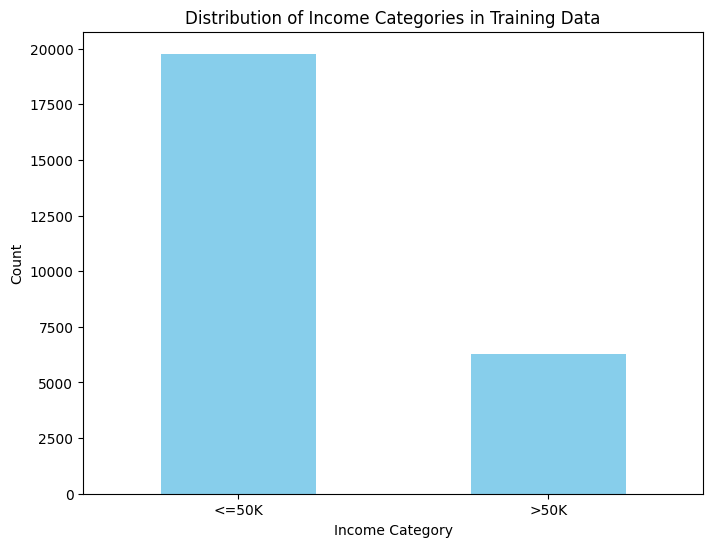

In [198]:
import matplotlib.pyplot as plt

# Count the occurrences of each income category in the training data
income_counts = y_train.value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
income_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Income Categories in Training Data')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


There is a significant imbalance in the income categories. With 18,123 instances of income <=50K and only 6,006 instances of income >50K, the data is imbalanced.
To address this imbalance and stratify the data for training and testing , we use the stratify parameter in the train_test_split function.

***Check test and training data shape***

In [199]:
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the training and testing sets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (26048, 13) (26048,)
Testing data shape: (6513, 13) (6513,)


***Peform stratification on the dataset based on income to handle imbalance***

In [200]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the data

# Calculate class distribution in the original dataset
class_distribution_original = df['income'].value_counts()
print("Original Class Distribution:")
print(class_distribution_original)

# Perform train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(df.drop('income', axis=1), df['income'], test_size=0.2, stratify=df['income'], random_state=42)

# Calculate class distribution in the training set
class_distribution_train = y_train.value_counts()
print("\nClass Distribution in Training Set:")
print(class_distribution_train)

# Calculate class distribution in the testing set
class_distribution_test = y_test.value_counts()
print("\nClass Distribution in Testing Set:")
print(class_distribution_test)
df.head()

Original Class Distribution:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Class Distribution in Training Set:
income
<=50K    19775
>50K      6273
Name: count, dtype: int64

Class Distribution in Testing Set:
income
<=50K    4945
>50K     1568
Name: count, dtype: int64


age workclass  fnlwgt marital_status   race     sex  capital_gain  \
0   90      None   77053        Widowed  White  Female             0   
1   82   Private  132870        Widowed  White  Female             0   
2   66      None  186061        Widowed  Black  Female             0   
3   54   Private  140359       Divorced  White  Female             0   
4   41   Private  264663      Separated  White  Female             0   

   capital_loss  hours_per_week income     education         occupation  \
0          4356              40  <=50K       HS-grad               None   
1          4356              18  <=50K       HS-grad    Exec-managerial   
2          4356              40  <=50K  Some-college               None   
3          3900              40  <=50K       7th-8th  Machine-op-inspct   
4          3900              40  <=50K  Some-college     Prof-specialty   

         country   relationship  
0  United-States  Not-in-family  
1  United-States  Not-in-family  
2  United-States      Unmarried  
3  United-States      Unmarried  
4  United-States      Own-child

***Remove possible duplicate columns for Exploratory Data Analysis***

In [201]:
duplicate_labels = df.columns[df.columns.duplicated()]

# Print the duplicate column names
print("Duplicate Columns:")
print(duplicate_labels)

Duplicate Columns:
Index([], dtype='object')


In [202]:
# !pip list

In [203]:
# !pip uninstall pydantic-settings

In [204]:
# !pip install --upgrade joblib

***Perform Exploratory Data Analysis on the training data with Ydata Profiling library***

In [205]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport

# Assuming df is your DataFrame containing the data

# Check for duplicate labels in the DataFrame
duplicate_labels = df.columns.duplicated()
print("Duplicate Labels:")
print(duplicate_labels)

# Drop duplicates if necessary
df_no_duplicates = df.loc[:, ~df.columns.duplicated()]

# Perform train/test split with stratification on the DataFrame without duplicates
X_train, X_test, y_train, y_test = train_test_split(df_no_duplicates.drop('income', axis=1), df_no_duplicates['income'], test_size=0.2, stratify=df_no_duplicates['income'], random_state=42)

# Generate a profile report for the training data without duplicates
profile = ProfileReport(X_train)
profile.to_notebook_iframe() # commented for temp



Duplicate Labels:
[False False False False False False False False False False False False
 False False]


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

***Check categorical and numerical columns based on data types***

In [206]:
import pandas as pd

# Assuming df is your DataFrame containing the data

# Get all columns except the target column ('income')
all_cols_except_target = df.columns[df.columns != 'income']

# Identify categorical columns based on their data types
categorical_cols = df[all_cols_except_target].select_dtypes(include='object').columns.tolist()

# Identify numerical columns based on their data types
numerical_cols = df[all_cols_except_target].select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the identified categorical and numerical columns
print("Categorical Columns:")
print(categorical_cols)
print(df.info())  # To check DataFrame structure and types


print("\nNumerical Columns:")
print(numerical_cols)


Categorical Columns:
['workclass', 'marital_status', 'race', 'sex', 'education', 'occupation', 'country', 'relationship']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   marital_status  32561 non-null  object
 4   race            32561 non-null  object
 5   sex             32561 non-null  object
 6   capital_gain    32561 non-null  int64 
 7   capital_loss    32561 non-null  int64 
 8   hours_per_week  32561 non-null  int64 
 9   income          32561 non-null  object
 10  education       32561 non-null  object
 11  occupation      30718 non-null  object
 12  country         31978 non-null  object
 13  relationship    32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB
None

Numerical

***Identify and note missing values and confirm data type in columns is correct***

In [207]:
# Categorize data into categorical and numerical columns
categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'country']
numerical_cols = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']
target_col = ['income']

# Identify null and missing values in the original dataset
null_values_original = df.isnull() | (df == 'None')
missing_values_original = df.isna().sum()

# Ensure correct data types
df[categorical_cols] = df[categorical_cols].astype('object')

# Display results
print("Categorical Columns:")
print(df[categorical_cols].head())

print("\nNumerical Columns:")
print(df[numerical_cols].head())

print("\nNull Values in Original Dataset:")
print(null_values_original)

print("\nMissing Values in Original Dataset:")
print(missing_values_original)


Categorical Columns:
  workclass     education marital_status         occupation   relationship  \
0      None       HS-grad        Widowed               None  Not-in-family   
1   Private       HS-grad        Widowed    Exec-managerial  Not-in-family   
2      None  Some-college        Widowed               None      Unmarried   
3   Private       7th-8th       Divorced  Machine-op-inspct      Unmarried   
4   Private  Some-college      Separated     Prof-specialty      Own-child   

    race     sex        country  
0  White  Female  United-States  
1  White  Female  United-States  
2  Black  Female  United-States  
3  White  Female  United-States  
4  White  Female  United-States  

Numerical Columns:
   age  fnlwgt  capital_gain  capital_loss  hours_per_week
0   90   77053             0          4356              40
1   82  132870             0          4356              18
2   66  186061             0          4356              40
3   54  140359             0          3900        

***Plot the feature correlation heatmap with correlation values displayed using Seaborn***

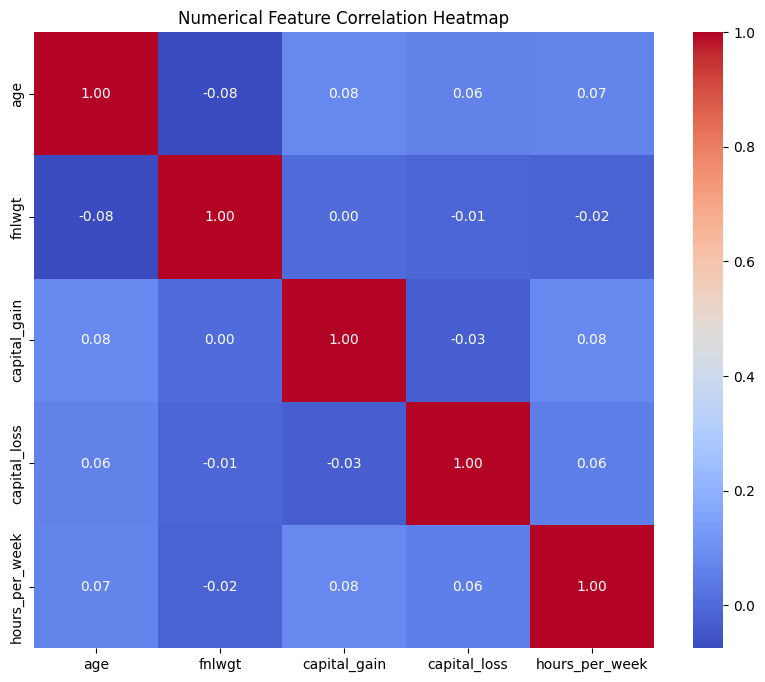

Pair Plots


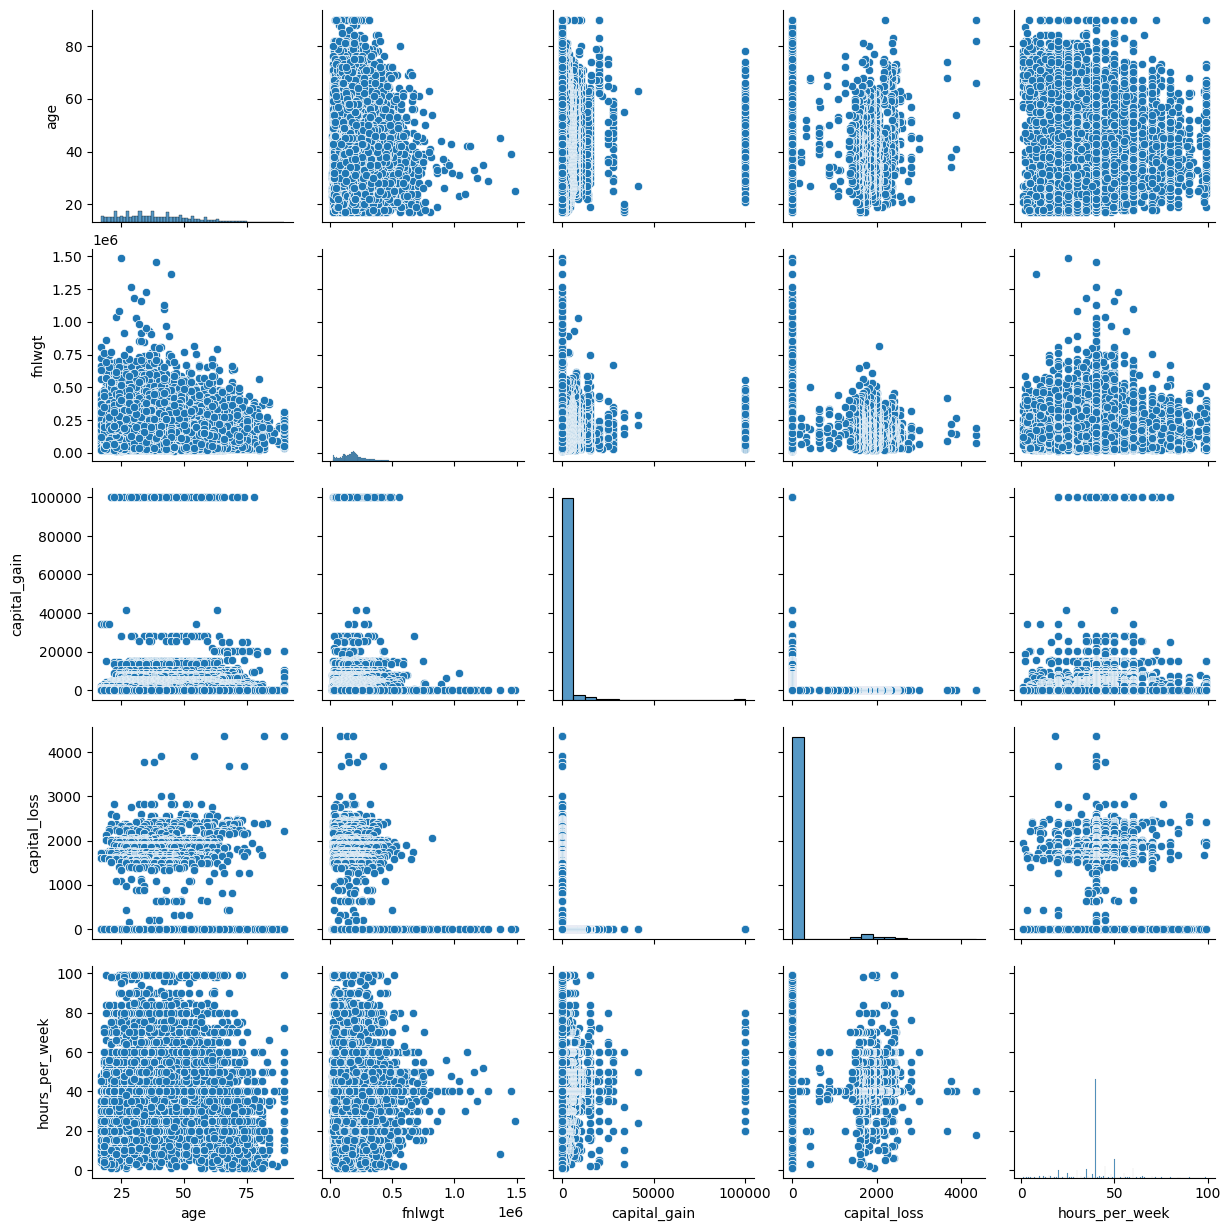

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

all_cols_except_target = df.columns[df.columns != 'income']

# Identify categorical columns based on their data types
categorical_cols = df[all_cols_except_target].select_dtypes(include='object').columns.tolist()

# Identify numerical columns based on their data types
numerical_cols = df[all_cols_except_target].select_dtypes(include=['int64', 'float64']).columns.tolist()


# Calculate correlation matrix for numerical columns
corr_matrix = X_train[numerical_cols].corr()

# Plot feature correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Numerical Feature Correlation Heatmap")
plt.show()


bold_text = "\033[1mPair Plots\033[0m"
print(bold_text)

sns.pairplot(df)
plt.show()

print(df_no_duplicates['income'].value_counts())  # Check the distribution of income categories



***Insights from Correlation Matrix:***

 1. **Age and Capital Gain:**
   - Positive correlation of approximately 0.078.
  - Slight tendency for capital gains to increase with age.

 2. **Age and Hours per Week:**
    - Positive correlation of about 0.069.
   - Mild tendency for older individuals to work slightly more hours per week.

 3. ***Capital Gain and Hours per Week:***
   - Positive correlation of around 0.078.
    - Individuals with higher capital gains may tend to work more hours per week.

 4. **Age and Fnlwgt:**
   - Weak negative correlation of about -0.077.
  - Slight tendency for older individuals to have slightly lower final weights.

 5. **Capital Loss and Capital Gain:**
   - Weak negative correlation of approximately -0.032.
   - Higher capital gains associated with slightly lower capital losses.

 6. **Hours per Week and Capital Loss:**
   - Mild positive correlation of about 0.054.
   - Individuals who work more hours per week may have slightly higher capital losses.


***Examine the distribution of each attribute***

***Temoprarily one hot encode the categorical columns and plot violin plots of the categorical variables grouped against income***

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


income
<=50K    24720
>50K      7841
Name: count, dtype: int64


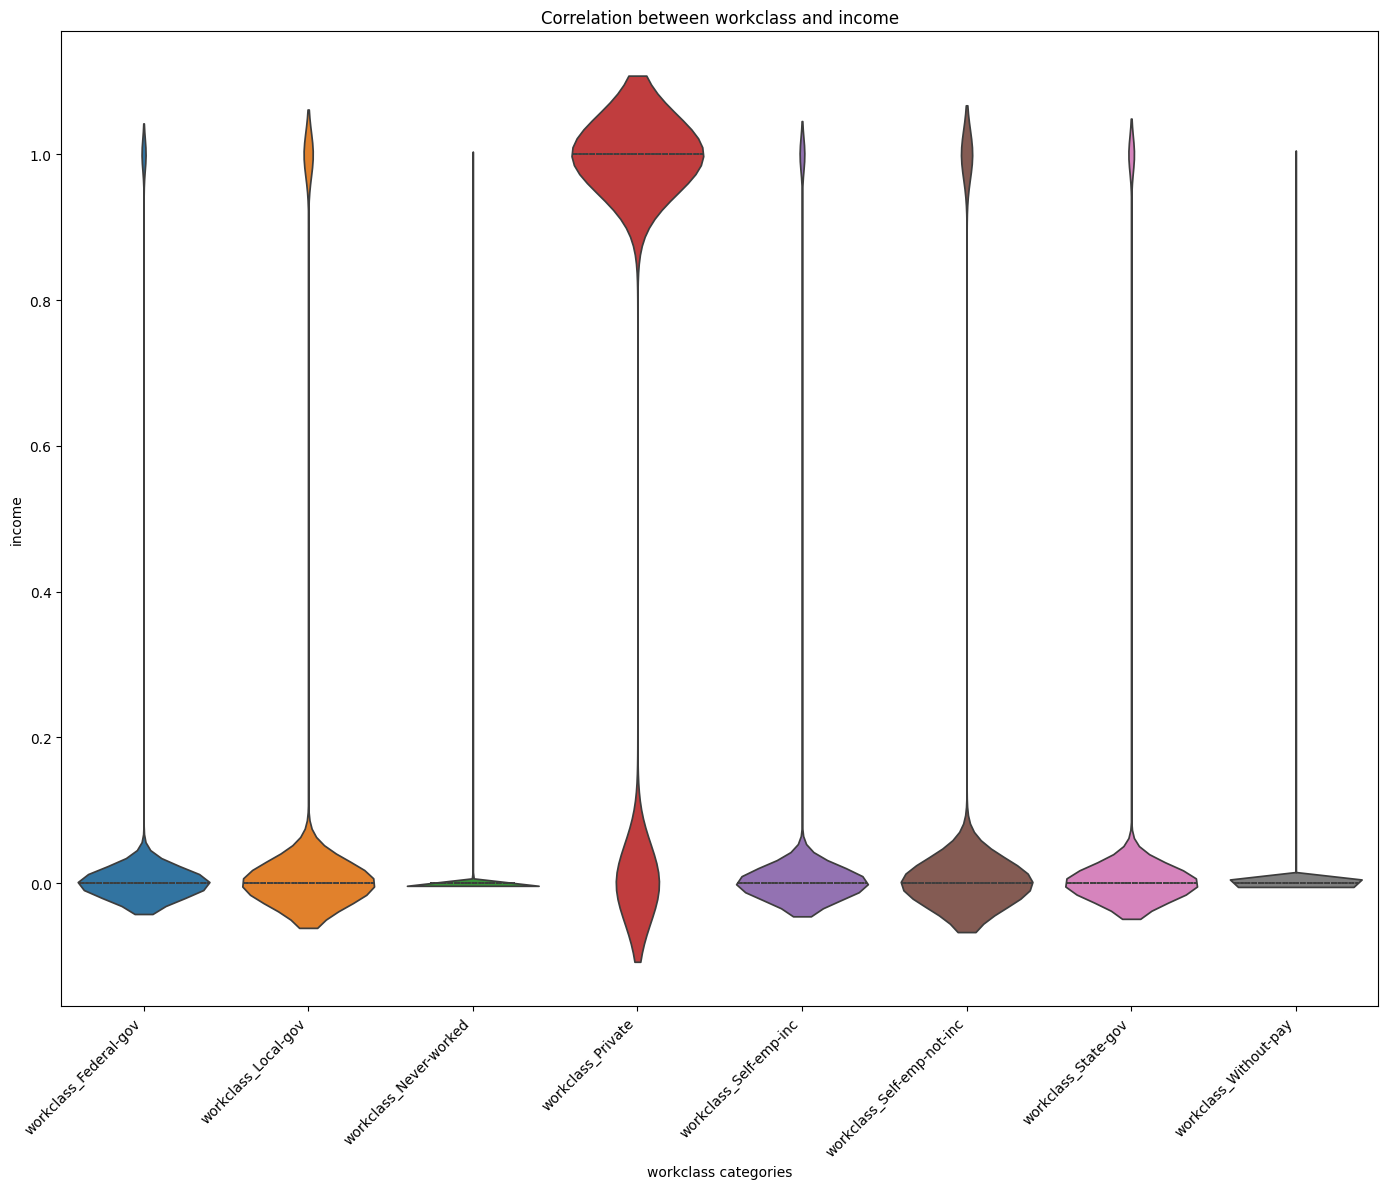

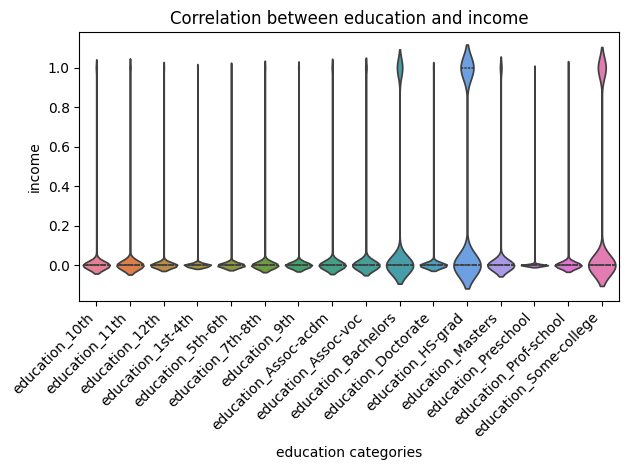

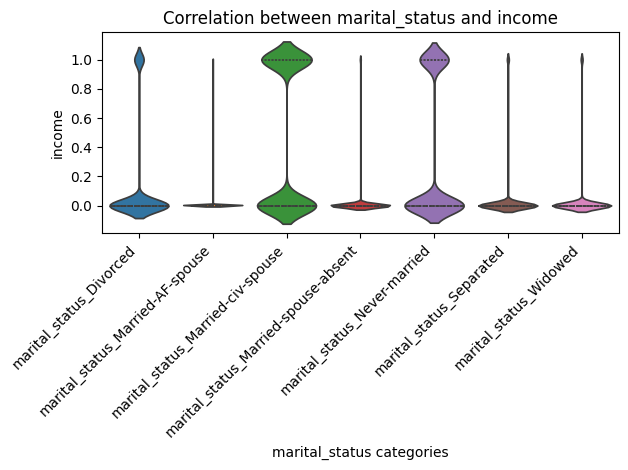

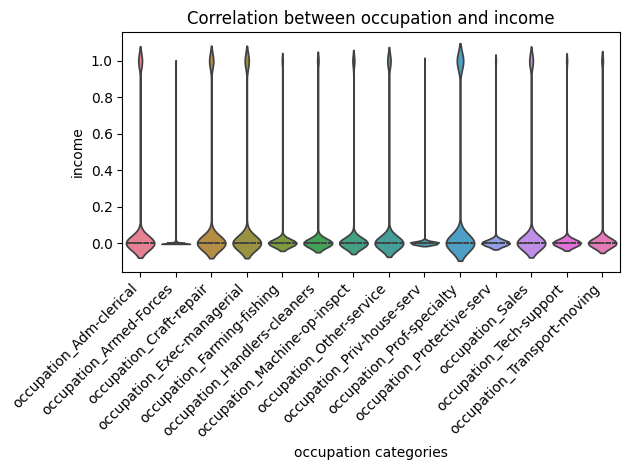

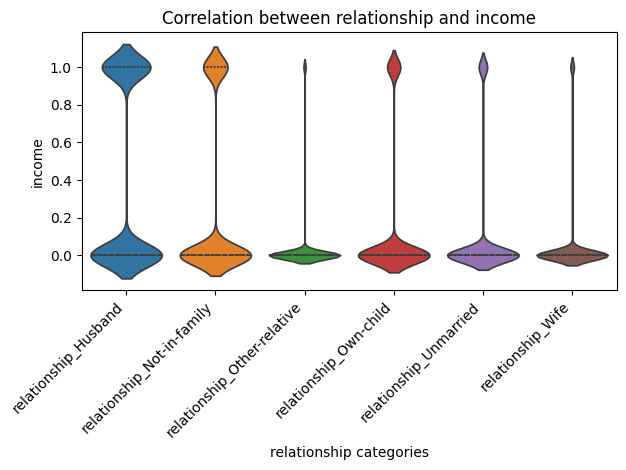

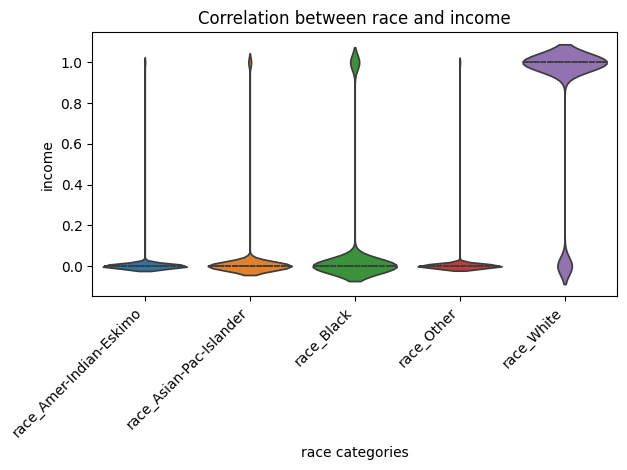

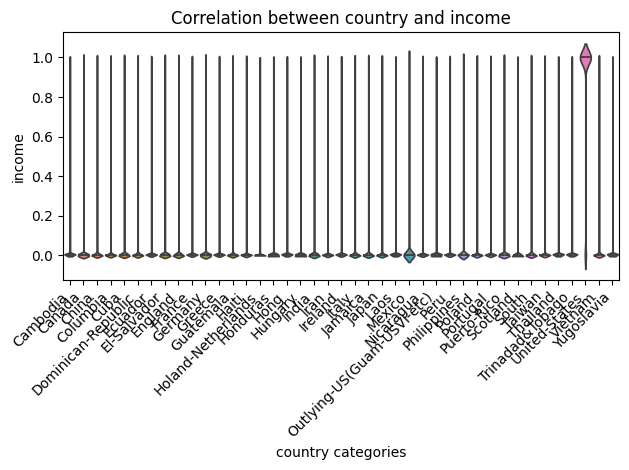

In [209]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Replace NaN values with the mode for categorical columns
df_no_duplicates[categorical_cols] = df_no_duplicates[categorical_cols].fillna(df_no_duplicates[categorical_cols].mode().iloc[0])

# Perform one-hot encoding for categorical columns
encoder = OneHotEncoder(sparse=False)
encoded_cols = encoder.fit_transform(df_no_duplicates[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols)

# Manually construct feature names based on unique values in categorical columns
feature_names = []
for i, col in enumerate(encoder.categories_):
    for category in col:
        feature_names.append(f"{categorical_cols[i]}_{category}")

encoded_df.columns = feature_names

# Concatenate the encoded columns back to the original DataFrame
df_encoded = pd.concat([df_no_duplicates, encoded_df], axis=1)

# Drop the original categorical columns
categorical_cols_to_drop = [col for col in categorical_cols]
df_encoded.drop(categorical_cols_to_drop, axis=1, inplace=True)

# Check the distribution of income categories after data preprocessing
print(df_encoded['income'].value_counts())

# Define the prefixes to group columns
prefixes = ['workclass_', 'education_', 'marital_status_', 'occupation_', 'relationship_', 'race_', 'country_']

import numpy as np  # Import NumPy for array manipulation

# Define the prefixes to group columns
prefixes = ['workclass_', 'education_', 'marital_status_', 'occupation_', 'relationship_', 'race_', 'country_']

# Plot violin plots for each group of columns based on prefixes
plt.figure(figsize=(14, 12))
for prefix in prefixes:
    columns_to_plot = [col for col in encoded_df.columns if col.startswith(prefix)]
    ax = sns.violinplot(data=encoded_df[columns_to_plot], inner="quart")
    plt.title(f"Correlation between {prefix[:-1]} and income")
    plt.xlabel(f"{prefix[:-1]} categories")
    plt.ylabel('income')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    if prefix == 'country_':
        # Spread out x-axis ticks for 'country_' group
        ax.set_xticks(np.arange(len(columns_to_plot)))
        ax.set_xticklabels([col[len(prefix):] for col in columns_to_plot], rotation=45, ha='right')
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()




Summary statistics for age:
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000



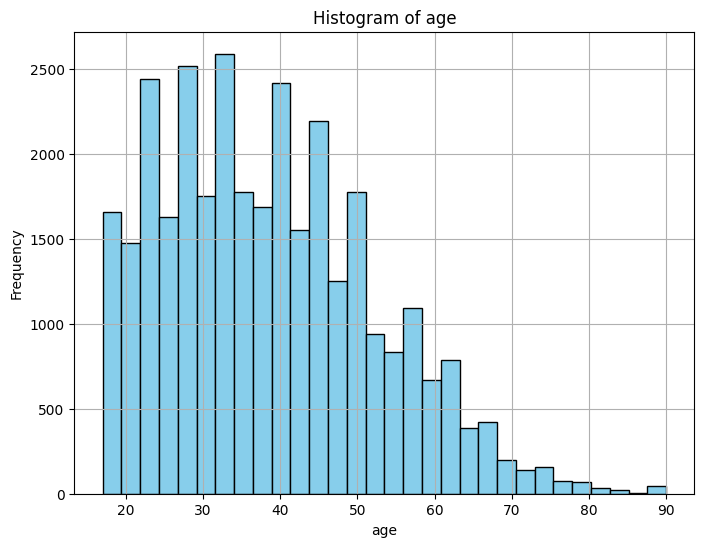

Summary statistics for fnlwgt:
count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06



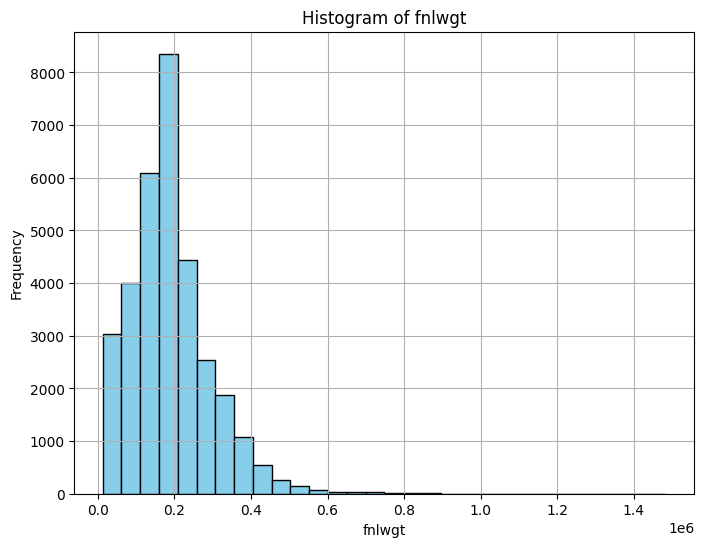

Summary statistics for capital_gain:
count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000



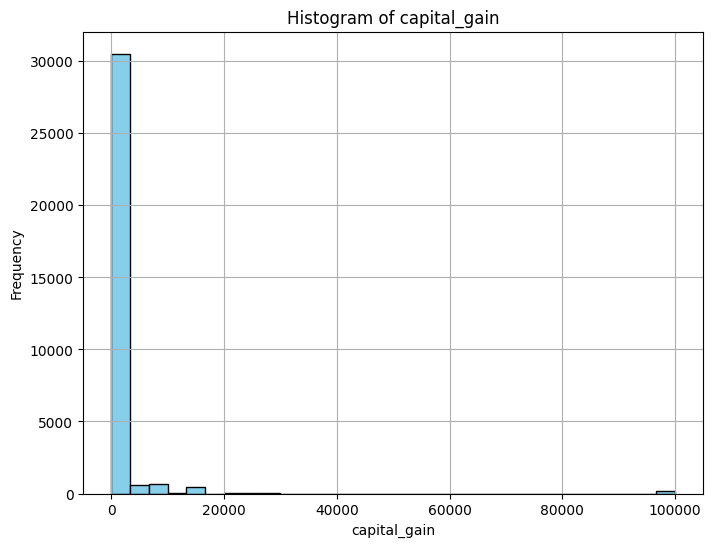

Summary statistics for capital_loss:
count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000



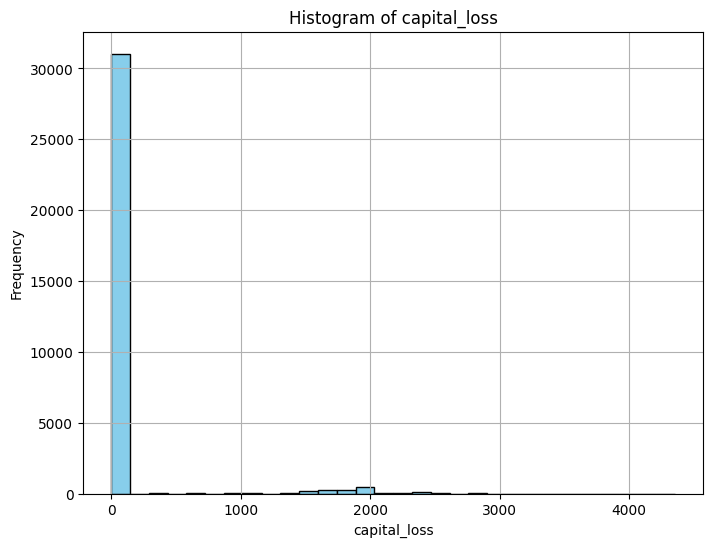

Summary statistics for hours_per_week:
count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000



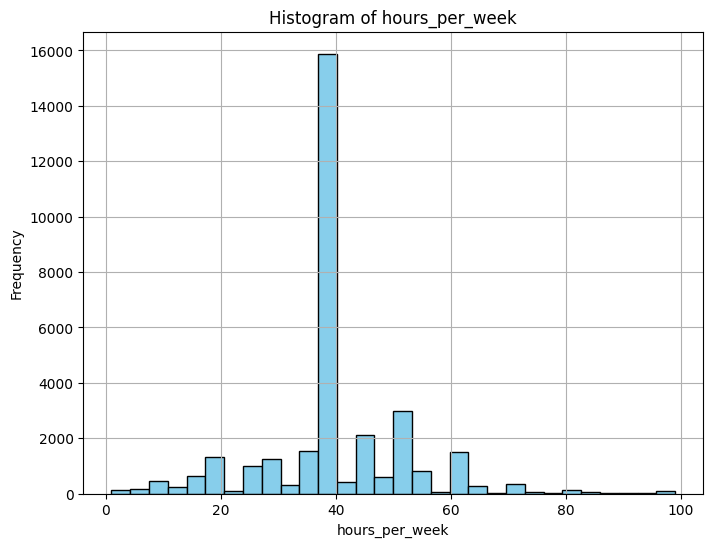

Mode for workclass: Private

Frequency for workclass:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7



<ipython-input-210-c9f2dc87b043>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


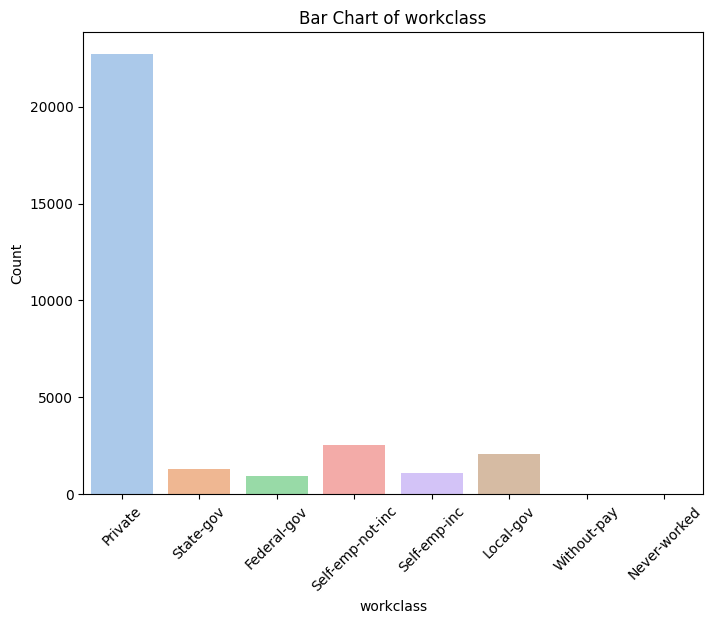

Mode for marital_status: Married-civ-spouse

Frequency for marital_status:
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23



<ipython-input-210-c9f2dc87b043>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


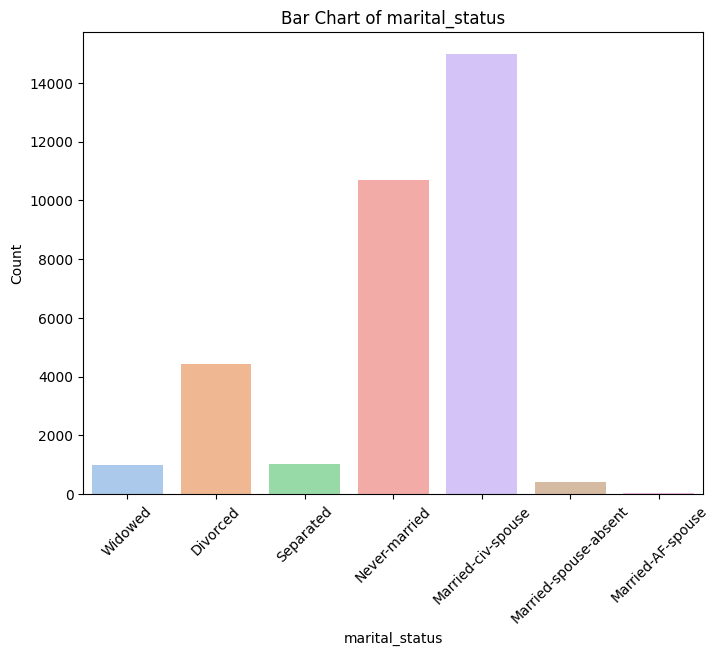

Mode for race: White

Frequency for race:
race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271



<ipython-input-210-c9f2dc87b043>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


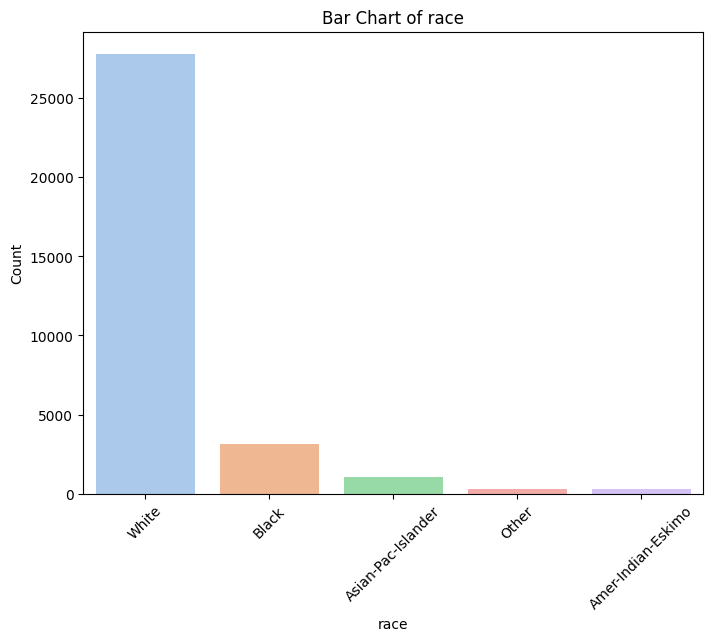

Mode for sex: Male

Frequency for sex:
sex
Male      21790
Female    10771



<ipython-input-210-c9f2dc87b043>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


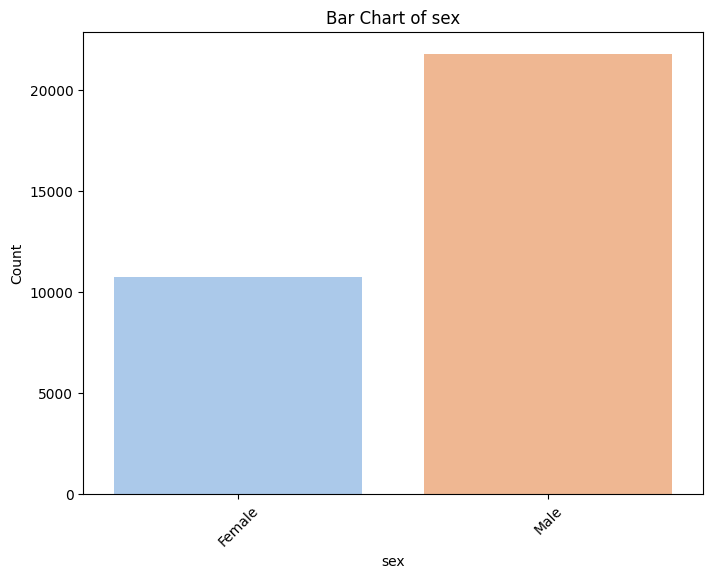

Mode for income: <=50K

Frequency for income:
income
<=50K    24720
>50K      7841



<ipython-input-210-c9f2dc87b043>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


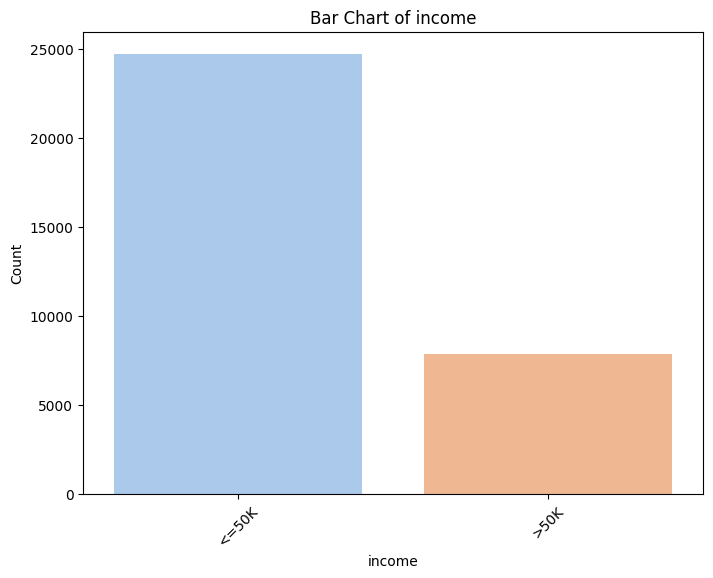

Mode for education: HS-grad

Frequency for education:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51



<ipython-input-210-c9f2dc87b043>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


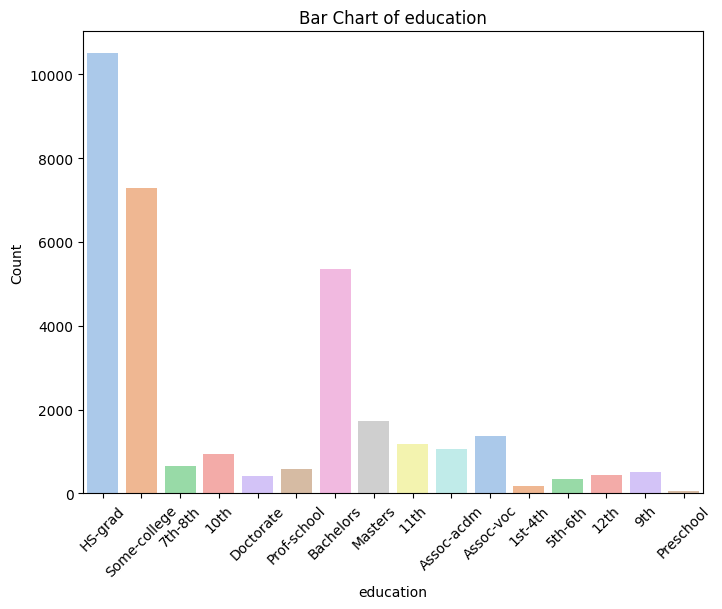

Mode for occupation: Prof-specialty

Frequency for occupation:
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9



<ipython-input-210-c9f2dc87b043>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


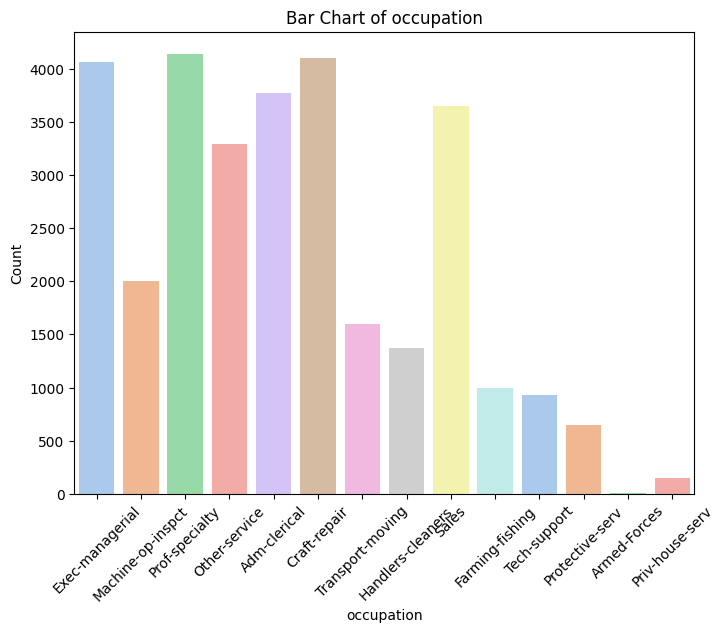

Mode for country: United-States

Frequency for country:
country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31


<ipython-input-210-c9f2dc87b043>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


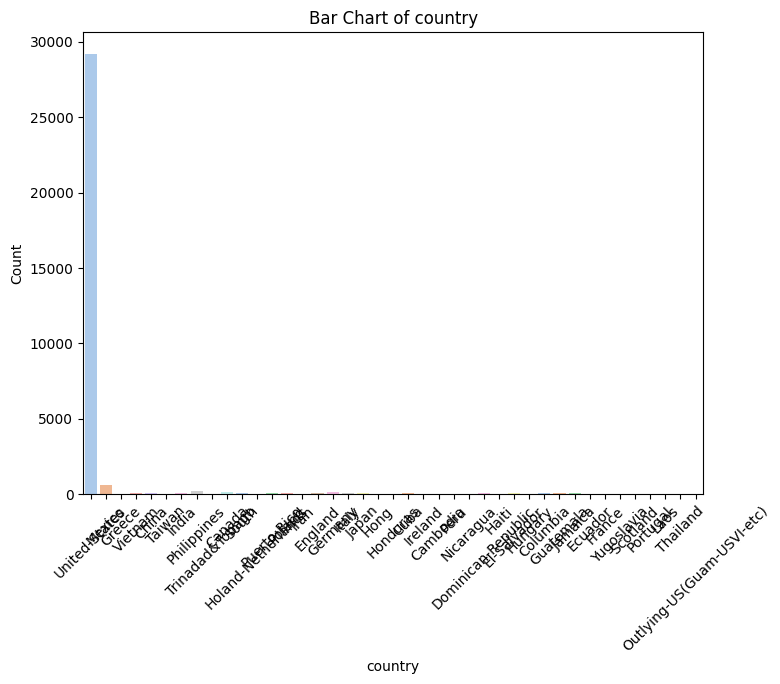

Mode for relationship: Husband

Frequency for relationship:
relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981



<ipython-input-210-c9f2dc87b043>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


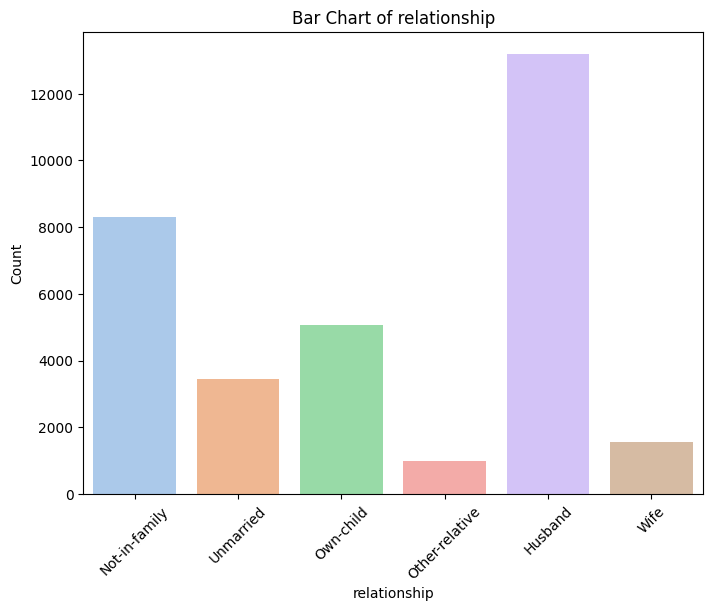

In [210]:
# Separate numerical and categorical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Examine distribution of numerical features and plot histograms
for col in numerical_cols:
    # Summary statistics for numerical features
    stats = df[col].describe().to_string()
    print(f"Summary statistics for {col}:\n{stats}\n")

    # Histogram for numerical features
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Examine distribution of categorical features and plot bar charts
for col in categorical_cols:
    # Mode and frequency for categorical features
    mode_value = df[col].mode().values[0]
    frequency = df[col].value_counts().to_string()
    print(f"Mode for {col}: {mode_value}\n")
    print(f"Frequency for {col}:\n{frequency}\n")

    # Bar chart for categorical features
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()



***We can derive below insights from the distribution of the features.***

**Age:**
The average age of individuals in the dataset is approximately 38.6 years, with a standard deviation of 13.6 years. The ages range from 17 to 90 years, with most individuals (75th percentile) being under 48 years old.

**fnlwgt:**
The mean final weight is around 189,778, with a considerable standard deviation of 105,500. The final weights vary widely from 12,285 to 1,484,705, indicating a diverse range of sample representation.

**Capital Gain and Capital Loss:**
The majority of individuals have a capital gain and capital loss of 0, as indicated by the 25th, 50th (median), and 75th percentiles. However, some individuals have significant capital gains and losses, with the maximum values being 99,999 and 4,356, respectively.

**Hours per Week:**
On average, individuals work around 40.4 hours per week, with a standard deviation of 12.3 hours. The hours worked per week range from 1 to 99 hours.
Categorical Features:

**Workclass:**
The most common workclass is "Private," with a frequency of 22,696 individuals. Other workclass categories have varying frequencies, such as "Self-emp-not-inc" (2,541) and "Local-gov" (2,093).

**Marital Status:**
"Married-civ-spouse" is the most common marital status, with approximately 14,976 individuals, followed by "Never-married" (10,683) and "Divorced" (4,443).

**Race and Sex:**
The majority of individuals are "White" (27,816) and "Male" (21,790), indicating a predominant demographic in the dataset.

**Income:**
The income distribution shows that 24,720 individuals have an income less than or equal to 50K USD ("<=50K"), while 7,841 individuals have an income greater than 50K USD (">50K").

**Education and Occupation:**
"HS-grad" is the most common education level, with 10,501 individuals, followed by "Some-college" (7,291) and "Bachelors" (5,355). In terms of occupation, "Prof-specialty" has the highest frequency (4,140), followed by "Craft-repair" (4,099) and "Exec-managerial" (4,066).

**Country:**
The majority of individuals are from the "United-States" (29,170), with other countries having lower frequencies ranging from a few individuals to several hundred.

***Create a class based preprocessor to peform below steps***:

  

*   ***Address null and missing values through Simple Imputer through mode as there is no clear pattern between missing data and to reduce computational effciency***
*  ***Lable Encoding implemented instead of One Hot Encoding as there are many categorical variables making the making later strategy computaionally inefficient***
*   ***Due to skewed nature of data and to handle and to stabalize variance of data points for classification, log transformation has been applied to the data***
*   ***The data has also been scaled apprpriately***


***The class takes the initial dataframe and categorical variables as input and outputs the processed dataframe***






In [211]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np

class Preprocessor:
    def __init__(self):
        self.imputer = SimpleImputer(strategy='most_frequent')
        self.scaler = StandardScaler()
        self.label_encoders = {}

    def transform(self, df, categorical_cols):
        # Handle missing values using SimpleImputer with mode
        imputed_data = self.imputer.fit_transform(df[categorical_cols])
        df_imputed = pd.DataFrame(imputed_data, columns=categorical_cols)

        # Perform label encoding for imputed categorical columns
        for col in categorical_cols:
            le = LabelEncoder()
            df_imputed[col] = le.fit_transform(df_imputed[col])
            self.label_encoders[col] = le

        # Concatenate the encoded columns back to the original DataFrame
        df_encoded = pd.concat([df.drop(columns=categorical_cols), df_imputed], axis=1)

        # Visualize the distribution of numerical features before scaling
        num_cols = df_encoded.select_dtypes(include=np.number).columns
        # df_encoded[num_cols].hist(figsize=(12, 8), bins=20)
        # plt.suptitle('Distribution of Numerical Features')
        # plt.show()

        # Apply log transformation to address non-normal distributions
        for col in num_cols:
            if col != 'income':
                df_encoded[col] = np.log1p(df_encoded[col])

        # Scale the data
        scaled_data = self.scaler.fit_transform(df_encoded.drop('income', axis=1))
        df_scaled = pd.DataFrame(scaled_data, columns=df_encoded.drop('income', axis=1).columns)

        # Add the 'income' column back to the scaled DataFrame
        df_scaled['income'] = df_encoded['income']

        return df_scaled



# Example usage:
preprocessor = Preprocessor()
# Load your DataFrame

# Define the categorical columns
categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'country']
# Preprocess the data without SMOTE
df_processed = preprocessor.transform(df, categorical_cols)


***Check label encoding after preprocessing and missing values before and after imputation***

In [212]:
print("Missing values before preprocessing\n")
print(df.isnull().sum().to_string())
print(df_processed.columns.tolist())
print("\nMissing values after preprocessing\n")
print(df_processed.isnull().sum().to_string())

for col in categorical_cols:
    unique_values = df_processed[col].unique()
    print(f"Unique values in label-encoded column '{col}': {unique_values}")

Missing values before preprocessing

age                  0
workclass         1836
fnlwgt               0
marital_status       0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
income               0
education            0
occupation        1843
country            583
relationship         0
['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'country', 'income']

Missing values after preprocessing

age               0
fnlwgt            0
capital_gain      0
capital_loss      0
hours_per_week    0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
country           0
income            0
Unique values in label-encoded column 'workclass': [ 2.02736745 -0.05688482  1.38143928 -3.61993761  0.98524132  0.51663858
 -1.83841122  1.724641

***Check data distribution of intial data***



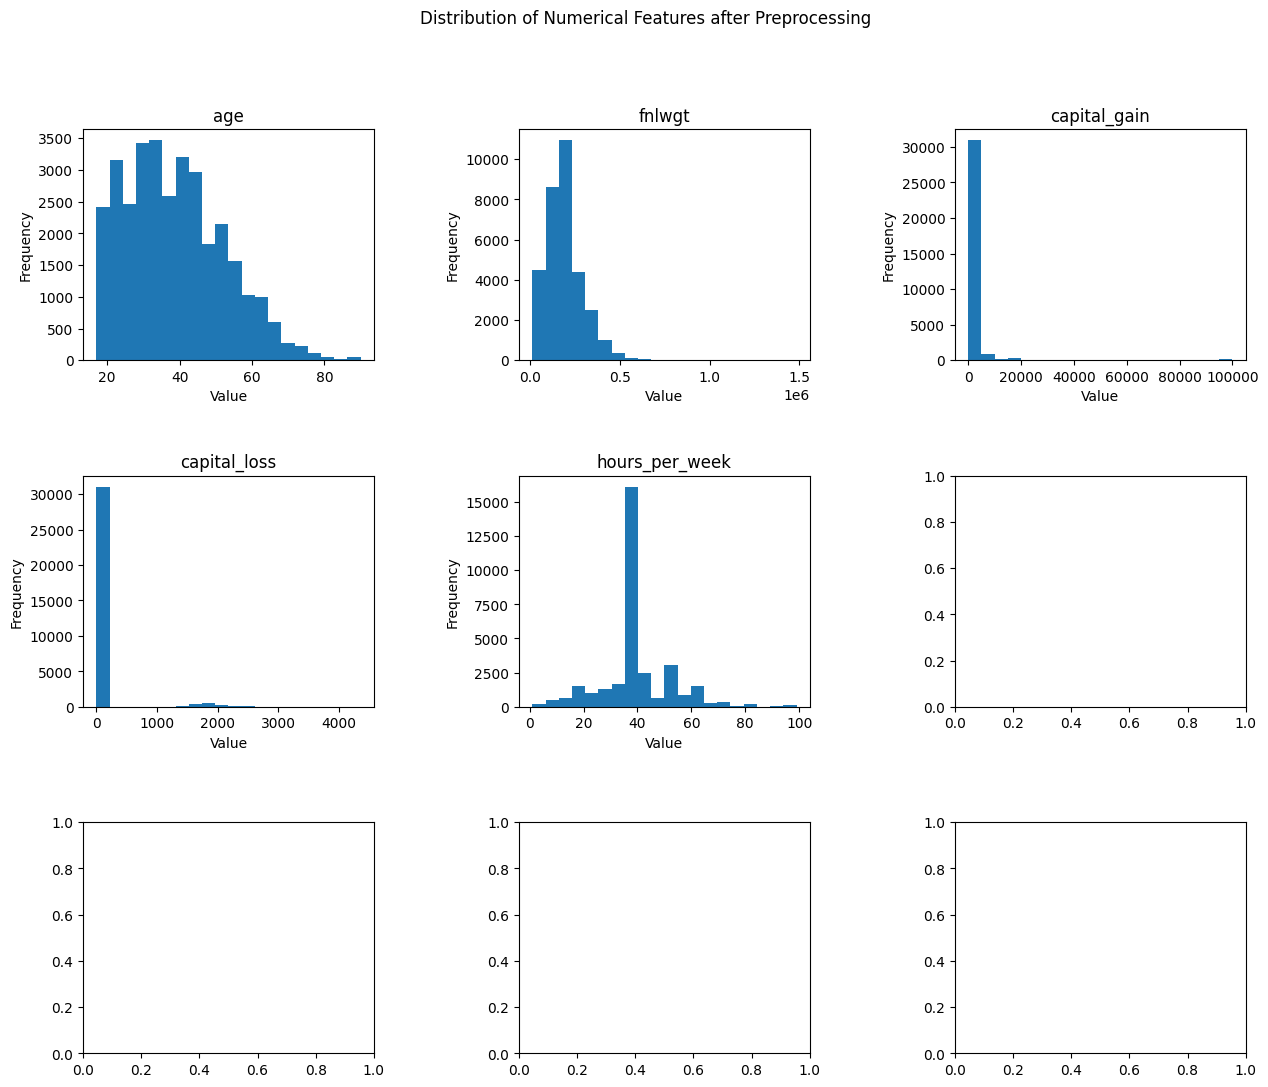

Shapiro-Wilk Test for age: Statistic=0.9668066501617432, p-value=0.0
Shapiro-Wilk Test for fnlwgt: Statistic=0.9223408699035645, p-value=0.0
Shapiro-Wilk Test for capital_gain: Statistic=0.12271404266357422, p-value=0.0
Shapiro-Wilk Test for capital_loss: Statistic=0.21831119060516357, p-value=0.0
Shapiro-Wilk Test for hours_per_week: Statistic=0.8851711750030518, p-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [213]:
# Check for normal distribution before the dataframe is preprocessed
num_cols_processed = df.select_dtypes(include=np.number).columns

# Create subplots with a spaced-out layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing between subplots

# Plot histograms of numerical features before preprocessing
for i, ax in enumerate(axes.flat):
    if i < len(num_cols_processed):
        ax.hist(df[num_cols_processed[i]], bins=20)
        ax.set_title(num_cols_processed[i])
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

# Display the plot
plt.suptitle('Distribution of Numerical Features after Preprocessing')
plt.show()

# Optionally, perform statistical tests for normality
from scipy.stats import shapiro

for col in num_cols_processed:
    stat, p = shapiro(df[col])
    print(f"Shapiro-Wilk Test for {col}: Statistic={stat}, p-value={p}")

***Check data distribution of processed data***



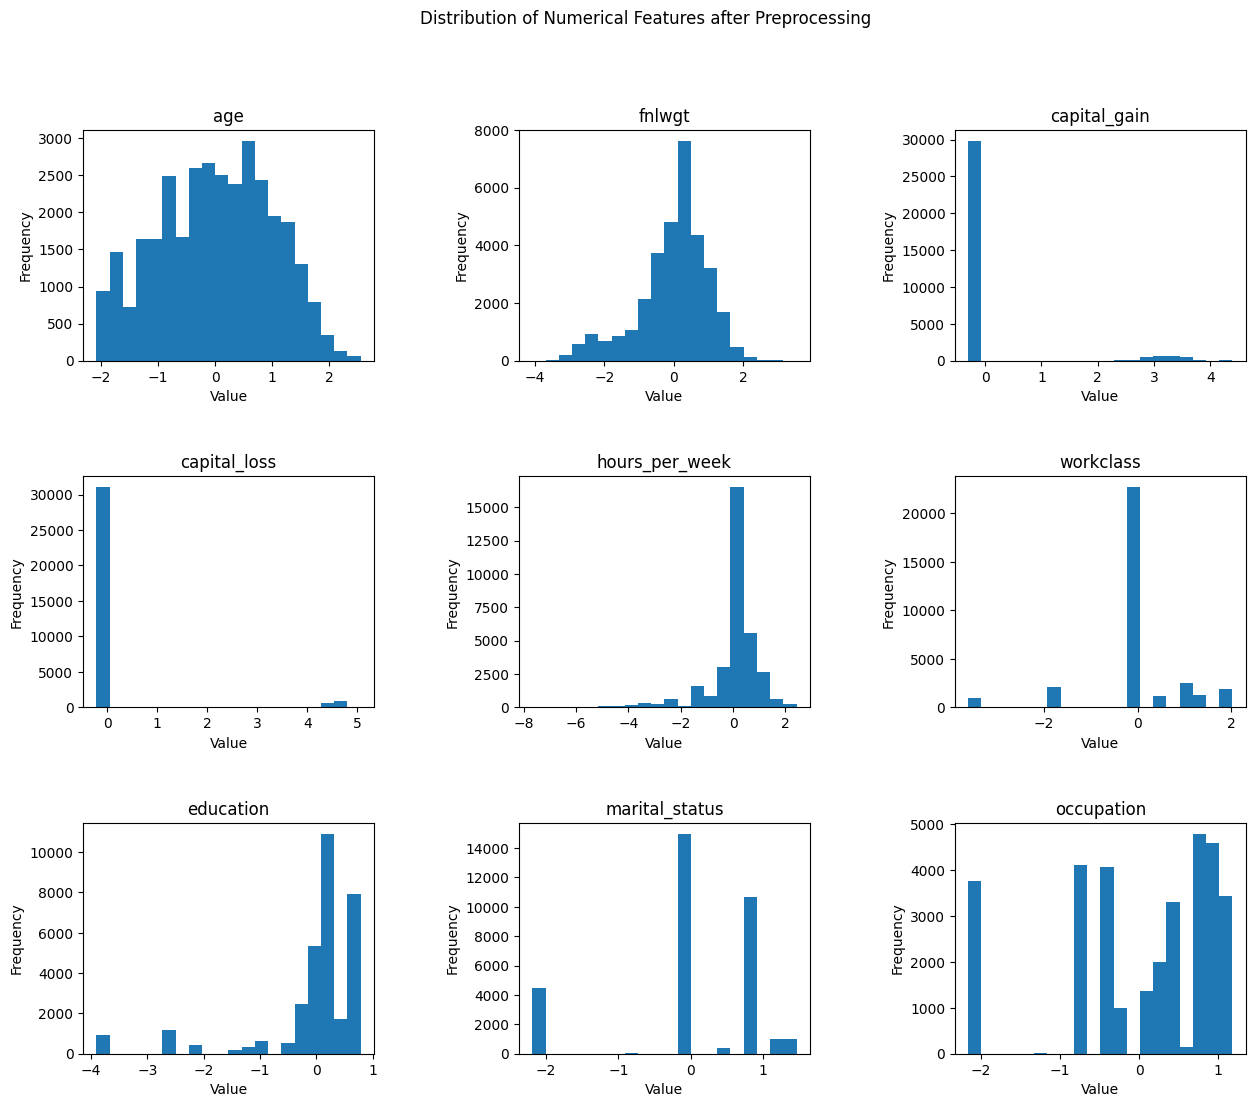

Shapiro-Wilk Test for age: Statistic=0.9841480851173401, p-value=0.0
Shapiro-Wilk Test for fnlwgt: Statistic=0.9497284293174744, p-value=0.0
Shapiro-Wilk Test for capital_gain: Statistic=0.31761157512664795, p-value=0.0
Shapiro-Wilk Test for capital_loss: Statistic=0.21555095911026, p-value=0.0
Shapiro-Wilk Test for hours_per_week: Statistic=0.755377471446991, p-value=0.0
Shapiro-Wilk Test for workclass: Statistic=0.7132151126861572, p-value=0.0
Shapiro-Wilk Test for education: Statistic=0.6590495109558105, p-value=0.0
Shapiro-Wilk Test for marital_status: Statistic=0.7801020741462708, p-value=0.0
Shapiro-Wilk Test for occupation: Statistic=0.869581937789917, p-value=0.0
Shapiro-Wilk Test for relationship: Statistic=0.8259199857711792, p-value=0.0
Shapiro-Wilk Test for race: Statistic=0.4154638648033142, p-value=0.0
Shapiro-Wilk Test for sex: Statistic=0.5937269330024719, p-value=0.0
Shapiro-Wilk Test for country: Statistic=0.2405570149421692, p-value=0.0


In [214]:
# Check for normal distribution in the preprocessed DataFrame
num_cols_processed = df_processed.select_dtypes(include=np.number).columns

# Create subplots with a spaced-out layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing between subplots

# Plot histograms of numerical features after preprocessing
for i, ax in enumerate(axes.flat):
    if i < len(num_cols_processed):
        ax.hist(df_processed[num_cols_processed[i]], bins=20)
        ax.set_title(num_cols_processed[i])
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

# Display the plot
plt.suptitle('Distribution of Numerical Features after Preprocessing')
plt.show()

# Optionally, perform statistical tests for normality
from scipy.stats import shapiro

for col in num_cols_processed:
    stat, p = shapiro(df_processed[col])
    print(f"Shapiro-Wilk Test for {col}: Statistic={stat}, p-value={p}")


***Split preprocessed data into test and training sets for modelling***

In [215]:
X = df_processed.drop('income', axis=1)
y = df_processed['income']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Output the shapes of the resulting DataFrames
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(y_test)

X_train shape: (26048, 13)
X_test shape: (6513, 13)
y_train shape: (26048,)
y_test shape: (6513,)
10489    <=50K
25652    <=50K
12243     >50K
25487     >50K
5091     <=50K
         ...  
6092      >50K
28260    <=50K
2419      >50K
32531    <=50K
19418    <=50K
Name: income, Length: 6513, dtype: object


In [216]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [217]:
print(y_train_encoded)

[1 0 0 ... 0 0 0]


 **Register experiments and models in MLFlow on Dagshub - Initial Testing
python**


In [218]:
# pip install mlflow dagshub

In [219]:
# import dagshub
# import mlflow

# dagshub.init("python-project-repo", "ashwini.patil5737", mlflow=True)
# mlflow.start_run()


# mlflow.log_param("parameter name ", "value")
# mlflow.log_metric("metric name", 1)

# mlflow.end_run()

**Create a pipeline with preprocessor and other data manipulation and models**

**Data Preprocessing and Model Pipeline
Feature Types:**

---

**Numeric Features:** Columns containing numerical data (integers or floats).

**Categorical Features:** Columns containing categorical data (strings).

**CustomPreprocessing Pipelines:**



*   *Numeric Transformer:*

      Imputer: Fills missing values using the median of each column.

      Scaler: Standardizes features by removing the mean and scaling to unit variance.

*   *Categorical Transformer:*

      Imputer: Fills missing values with the string 'missing'.

      LabelEncoder: Encodes categorical values as integer values.

**Model Definition:**


*   LogisticRegression: A linear model for binary classification that estimates the probability of a binary response based on one or more predictor variables.

**Pipeline Creation:**

Combines the preprocessing steps and the model into a single pipeline:

*   CustomPreprocessor: Applies the defined preprocessing steps.

*   Classifier: Uses the preprocessed data to train the given model.

In [223]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

# Define preprocessing steps
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('labelencoder', LabelEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = LogisticRegression()

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Fit the pipeline
pipeline.fit(X_train, y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week',
                                                   'workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex', 'country']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('labelencoder',
                                                                   LabelEncoder())]),
                                                  [])])),
                ('classifier', LogisticRegression())])

Configure MLflow to track experiments in our project repository on Dagshub. The provided URI and credentials allow secure logging of metrics, parameters, and models directly within the repository environment.



In [221]:
import os
MLFLOW_TRACKING_URI = "https://dagshub.com/ashwini.patil5737/python-project-repo.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'ashwini.patil5737'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '561f4721cea5fa7162e354cfda29b750a5ae182a'


**Select the simplest model (baseline) and register its metric as the baseline model**

Experiment - 1

In [224]:
#Experiment 1 - logging baseline model

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import mlflow
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from mlflow.models import infer_signature

# # Fit the label encoder
# label_encoder = LabelEncoder()
# label_encoder.fit(y_train)

# # Encode the true labels
# y_true_encoded = label_encoder.transform(y_test)

# Create pipeline with logistic regression
# pipeline = Pipeline([
#     ('classifier', LogisticRegression())
# ])

# Fit and predict using the pipeline
model = pipeline.fit(X_train, y_train_encoded)
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # For roc_auc_score

# Encode the predicted labels
# y_pred_encoded = label_encoder.transform(y_pred)

# Get the coefficients and intercepts
logistic_regression_model = pipeline.named_steps['classifier']

coefficients = logistic_regression_model.coef_
intercept = logistic_regression_model.intercept_

# Convert coefficients to a DataFrame for better visualization
coefficients_df = pd.DataFrame(coefficients, columns=X_train.columns)

# Display summary
print("Intercepts:")
print(intercept)
print("\nCoefficients:")
print(coefficients_df)

accuracy = accuracy_score(y_test_encoded, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred)

# Compute metrics
# accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
# balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_pred_encoded)
# f1 = f1_score(y_test_encoded, y_pred_encoded)
# precision = precision_score(y_test_encoded, y_pred_encoded)
# recall = recall_score(y_test_encoded, y_pred_encoded)
# roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)
# conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
# classification_rep = classification_report(y_test_encoded, y_pred_encoded)

# Log model
mlflow.set_tag("Training", "Logistice Regression baseline model for salary prediction data")
signature = infer_signature(X_train, pipeline.predict(X_test))
model_log_info = mlflow.sklearn.log_model(sk_model=pipeline,
                                          artifact_path="SalaryClassification_Model",
                                          signature=signature,
                                          input_example=X_train,
                                          registered_model_name="Logistic_regression_model")

# Log metrics to MLFlow
mlflow.log_metric("accuracy", accuracy)
mlflow.log_metric("balanced_accuracy", balanced_accuracy)
mlflow.log_metric("f1_score", f1)
mlflow.log_metric("precision", precision)
mlflow.log_metric("recall", recall)
mlflow.log_metric("roc_auc", roc_auc)

# Log the classification report as an artifact
with open("classification_report.txt", "w") as file:
    file.write(classification_rep)
mlflow.log_artifact("classification_report.txt")

# Flatten the confusion matrix
flattened_conf_matrix = conf_matrix.flatten()

# Log each value of the flattened confusion matrix as a separate metric
for i, value in enumerate(flattened_conf_matrix):
    mlflow.log_metric(f"confusion_matrix_{i}", value)

print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

results = {}
results['logistic_regression'] = {
        'f1':f1,
        'precision':precision,
        'recall':recall,
        'roc_auc':roc_auc,
        'balanced_accuracy':balanced_accuracy,
        'accuracy': accuracy,
        'classification_report': classification_rep,
        'confusion_matrix': conf_matrix,
        'classifier': LogisticRegression()
    }


Intercepts:
[-1.63020265]

Coefficients:
        age    fnlwgt  capital_gain  capital_loss  hours_per_week  workclass  \
0  0.574002  0.057978      0.536166      0.281045        0.539966  -0.168975   

   education  marital_status  occupation  relationship     race       sex  \
0   0.373189       -0.017887    0.091404     -0.581929  0.09336  0.107885   

    country  
0 -0.000076  
Accuracy: 0.7951788730231844
Balanced Accuracy: 0.6351561049091021
F1 Score: 0.4342663273960984
Precision: 0.6481012658227848
Recall: 0.32653061224489793
ROC AUC: 0.8148770403004477
Confusion Matrix:
[[4667  278]
 [1056  512]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      4945
           1       0.65      0.33      0.43      1568

    accuracy                           0.80      6513
   macro avg       0.73      0.64      0.65      6513
weighted avg       0.78      0.80      0.77      6513



Registered model 'Logistic_regression_model' already exists. Creating a new version of this model...
Created version '5' of model 'Logistic_regression_model'.


**Experiment with different models**

*   KNN
*   XGBoost
*   SVM
*   Ridge




In [225]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate classifiers
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
svc = SVC()
lr = LogisticRegression(max_iter=1000)
xgb = XGBClassifier()
ridge = RidgeClassifier()


classifiers = {
    'knn': knn,
    'ridge': ridge,
    'svm': svc,
    'xgboost': xgb
}
# Fit the label encoder
# label_encoder = LabelEncoder()
# label_encoder.fit(y_train)

# # Encode the true labels
# y_train_encoded = label_encoder.transform(y_test)
# y_train_encoded = label_encoder.transform(y_train)
# Dictionary to store results
# results = {}

# Fit and evaluate each classifier
for name, clf in classifiers.items():
  model = clf.fit(X_train, y_train_encoded)
  y_pred_encoded = clf.predict(X_test)
  # y_pred_encoded = label_encoder.transform(y_pred)
  y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
  # accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
  # report = classification_report(y_test_encoded, y_pred_encoded)
  # matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
  # balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_pred_encoded)
  # f1 = f1_score(y_test_encoded, y_pred_encoded)
  # precision = precision_score(y_test_encoded, y_pred_encoded)
  # recall = recall_score(y_test_encoded, y_pred_encoded)
  # roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)
  accuracy = accuracy_score(y_test_encoded, y_pred)
  balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_pred)
  f1 = f1_score(y_test_encoded, y_pred)
  precision = precision_score(y_test_encoded, y_pred)
  recall = recall_score(y_test_encoded, y_pred)
  roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)
  matrix = confusion_matrix(y_test_encoded, y_pred)
  report = classification_report(y_test_encoded, y_pred)
  results[name] = {'f1':f1,'precision':precision,'recall':recall,'roc_auc':roc_auc,'balanced_accuracy':balanced_accuracy,'accuracy': accuracy, 'classification_report': report, 'confusion_matrix': matrix, 'classifier': clf, 'model': model}



In [ ]:
print(results)

**Register Top 3 models to dagshub**

Experiment - 2, 3, 4

In [ ]:
#Experiment 2,3,4
mlflow.set_experiment("SalaryClassification_BestThreeModels")

# Select top three models based on accuracy
top_3_models = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)[:3]

# Log accuracy, classification report, and confusion matrix for the top three models using MLflow
for name, result in top_3_models:
    # Log accuracy

    print(name, result['accuracy'],result)
    mlflow.set_tag("Training", f"{name} model for salary prediction data")
    signature = infer_signature(X_train, pipeline.predict(X_test))
    model_log_info = mlflow.sklearn.log_model(sk_model= pipeline,
              artifact_path="SalaryClassification_Model",
              signature=signature,
              input_example=X_train,
              registered_model_name=f"{name}_model__final")
    mlflow.log_metric(f"{name}_accuracy", result['accuracy'])
    mlflow.log_metric("balanced_accuracy", result['balanced_accuracy'])
    mlflow.log_metric("f1_score", result['f1'])
    mlflow.log_metric("precision", result['precision'])
    mlflow.log_metric("recall", result['recall'])
    mlflow.log_metric("roc_auc", result['roc_auc'])

    # Log the classification report as an artifact
    with open(f"{name}_classification_report.txt", "w") as file:
        file.write(result['classification_report'])
    mlflow.log_artifact(f"{name}_classification_report.txt")

    # Flatten the confusion matrix
    flattened_conf_matrix = result['confusion_matrix'].flatten()
    # Log each value of the flattened confusion matrix as a separate metric
    for i, value in enumerate(flattened_conf_matrix):
        mlflow.log_metric(f"{name}confusion_matrix_{i}", value)

**Hyperparameters tuning and Feature Selection**

Define hyperparameters for tuning for each model


In [42]:
# Define hyperparameters for tuning for each model
param_grids =  {
    'logistic_regression': {
        'classifier__penalty': ['l2'],
        'classifier__C': [0.1, 1, 10]
    },
    'knn': {
        'classifier__n_neighbors': [5, 10, 15],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree']
    },
    'ridge': {
        'classifier__alpha': [0.1, 1, 10],
        'classifier__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    }
}

In [ ]:
param_grids = {
    'xgboost': {
        'classifier__max_depth': [3, 6, 9],
        'classifier__learning_rate': [0.01, 0.1, 0.3],
        'classifier__n_estimators': [100, 300, 500],
        'classifier__min_child_weight': [1, 3, 5],
        'classifier__gamma': [0, 0.1, 0.2],
        'classifier__subsample': [0.6, 0.8, 1.0],
        'classifier__colsample_bytree': [0.6, 0.8, 1.0],
        'classifier__reg_alpha': [0, 0.1, 0.5, 1],
        'classifier__reg_lambda': [0.1, 1, 10]
    },
    'knn': {
        'classifier__n_neighbors': [5, 10, 15],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'classifier__p': [1, 2]  # Minkowski distance order
    },
    'svm': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'classifier__degree': [2, 3, 4],  # Degree of the polynomial kernel
        'classifier__gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    }
}


**Experiment 5 - hyperparameter tuning and 6 - feature selection for Model 1**


XGBoost Model

In [ ]:
#Experiment 5 ,6
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline
import mlflow
import pandas as pd
from xgboost import XGBClassifier

mlflow.set_experiment("XGBoost_HyperParameterTuning")

# Perform hyperparameter tuning and record scores in MLFlow
name = top_3_models[0][0]
clf = top_3_models[0][1]

print(clf)
print(f"Performing hyperparameter tuning for {name}")

# Create pipeline with classifier
pipeline = Pipeline([
    ('classifier', clf['classifier'])
])

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
# Print best model and score
print(f"Best model for {name}: {best_model}")
print(f"Best accuracy for {name}: {best_score}")

# Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred)

# Log hyperparameter-tuned model and score
mlflow.log_param(f"{name}_hyperparameter", name)
mlflow.log_params(param_grids[name])
mlflow.sklearn.log_model(best_model, f"{name}_best_model")
mlflow.log_metric(f"{name}_best_accuracy", best_score)
signature = infer_signature(X_train, best_model.predict(X_test))
model_log_info = mlflow.sklearn.log_model(sk_model=best_model,
                                          artifact_path="SalaryClassification_Model",
                                          signature=signature,
                                          input_example=X_train,
                                          registered_model_name=f"{name}_model_hyperparametertuning_final")
# Log metrics to MLFlow
mlflow.log_metric(f"{name}_accuracy", accuracy)
mlflow.log_metric(f"{name}_balanced_accuracy", balanced_accuracy)
mlflow.log_metric(f"{name}_f1_score", f1)
mlflow.log_metric(f"{name}_precision", precision)
mlflow.log_metric(f"{name}_recall", recall)
mlflow.log_metric(f"{name}_roc_auc", roc_auc)

# Log the classification report as an artifact
with open(f"{name}_classification_report.txt", "w") as file:
    file.write(classification_rep)
mlflow.log_artifact(f"{name}_classification_report.txt")

# Flatten the confusion matrix
flattened_conf_matrix = conf_matrix.flatten()

# Log each value of the flattened confusion matrix as a separate metric
for i, value in enumerate(flattened_conf_matrix):
    mlflow.log_metric(f"{name}_confusion_matrix_{i}", value)


In [ ]:
print(f"Performing Feature Selection for {name}")

# Get feature importances
feature_importances = best_model.named_steps['classifier'].feature_importances_
feature_indices = feature_importances.argsort()[::-1][:10]  # Select top 10 features
X_train_selected = X_train[:, feature_indices]
X_test_selected = X_test[:, feature_indices]

# Train and evaluate the model with selected features
best_model.fit(X_train_selected, y_train)
y_pred_selected = best_model.predict(X_test_selected)
y_pred_selected_proba = best_model.predict_proba(X_test_selected)[:, 1] if hasattr(best_model.named_steps['classifier'], "predict_proba") else [0] * len(y_test_encoded)
accuracy_fs = accuracy_score(y_test_encoded, y_pred_selected)
balanced_accuracy_fs = balanced_accuracy_score(y_test_encoded, y_pred_selected)
f1_fs = f1_score(y_test_encoded, y_pred_selected)
precision_fs = precision_score(y_test_encoded, y_pred_selected)
recall_fs = recall_score(y_test_encoded, y_pred_selected)
roc_auc_fs = roc_auc_score(y_test_encoded, y_pred_selected_proba)
conf_matrix_fs = confusion_matrix(y_test_encoded, y_pred_selected)
classification_rep_fs = classification_report(y_test_encoded, y_pred_selected)

# Log feature selection model and score
mlflow.log_param(f"{name}_model_featue_selection", name)
mlflow.sklearn.log_model(best_model, f"{name}_feature_selection")
signature_fs = infer_signature(X_train_selected, best_model.predict(X_test_selected))
model_log_info = mlflow.sklearn.log_model(sk_model=best_model,
                                          artifact_path="SalaryClassification_Model",
                                          signature=signature_fs,
                                          input_example=X_train_selected,
                                          registered_model_name=f"{name}_model_featue_selection_final")
mlflow.log_metric(f"{name}_accuracy_fs", accuracy_fs)
mlflow.log_metric(f"{name}_balanced_accuracy_fs", balanced_accuracy_fs)
mlflow.log_metric(f"{name}_f1_score_fs", f1_fs)
mlflow.log_metric(f"{name}_precision_fs", precision_fs)
mlflow.log_metric(f"{name}_recall_fs", recall_fs)
mlflow.log_metric(f"{name}_roc_auc_fs", roc_auc_fs)

# Log the classification report as an artifact
with open("classification_report_fs.txt", "w") as file:
    file.write(classification_rep_fs)
mlflow.log_artifact("classification_report_fs.txt")

# Flatten the confusion matrix
flattened_conf_matrix = conf_matrix_fs.flatten()

# Log each value of the flattened confusion matrix as a separate metric
for i, value in enumerate(flattened_conf_matrix):
    mlflow.log_metric(f"{name}_confusion_matrix_fs_{i}", value)

Logistic Regression Model

In [43]:
#Experiment 5 - hyperparameter tuning and 6 - feature selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
import mlflow
import pandas as pd

mlflow.set_experiment("Logistic_Regression_HyperParameterTuning")


# Perform hyperparameter tuning and record scores in MLFlow
for name, clf in top_3_models[:1]:
    print(clf)
    print(f"Performing hyperparameter tuning for {name}")

    # Create pipeline with classifier
    pipeline = Pipeline([
        ('classifier', clf['classifier'])
    ])

    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train_encoded)

    # Best model and its score
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    # Print best model and score
    print(f"Best model for {name}: {best_model}")
    print(f"Best accuracy for {name}: {best_score}")

    # Predictions
    y_pred = best_model.predict(X_test)
    # y_pred_numerical = label_encoder.transform(y_pred)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    # Evaluation metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    classification_rep = classification_report(y_test_encoded, y_pred)

    # Log hyperparameter-tuned model and score
    mlflow.log_param(f"{name}_hyperparameter", name)
    mlflow.log_params(param_grids[name])
    mlflow.sklearn.log_model(best_model, f"{name}_best_model")
    mlflow.log_metric(f"{name}_best_accuracy", best_score)
    signature = infer_signature(X_train, best_model.predict(X_test))
    model_log_info = mlflow.sklearn.log_model(sk_model= best_model,
              artifact_path="SalaryClassification_Model",
              signature=signature,
              input_example=X_train,
              registered_model_name=f"{name}_model_hyperparametertuning_final")
    # Log metrics to MLFlow
    mlflow.log_metric(f"{name}_accuracy", accuracy)
    mlflow.log_metric(f"{name}_balanced_accuracy", balanced_accuracy)
    mlflow.log_metric(f"{name}_f1_score", f1)
    mlflow.log_metric(f"{name}_precision", precision)
    mlflow.log_metric(f"{name}_recall", recall)
    mlflow.log_metric(f"{name}_roc_auc", roc_auc)

    # Log the classification report as an artifact
    with open(f"{name}_classification_report.txt", "w") as file:
        file.write(classification_rep)
    mlflow.log_artifact(f"{name}_classification_report.txt")

    # Flatten the confusion matrix
    flattened_conf_matrix = conf_matrix.flatten()

    # Log each value of the flattened confusion matrix as a separate metric
    for i, value in enumerate(flattened_conf_matrix):
        mlflow.log_metric(f"{name}_confusion_matrix_{i}", value)



    print(f"Performing Feature Selection for {name}")
    mlflow.set_experiment("Logistic_Regression_Feature_selection")


    rfe = RFE(estimator=best_model.named_steps['classifier'], n_features_to_select=10)
    X_train_selected = rfe.fit_transform(X_train, y_train)
    X_test_selected = rfe.transform(X_test)

    # Evaluate the model with selected features
    best_model.fit(X_train_selected, y_train)
    y_pred_selected = best_model.predict(X_test_selected)
    y_pred_selected_proba = best_model.predict_proba(X_test_selected)[:, 1] if hasattr(best_model.named_steps['classifier'], "predict_proba") else [0] * len(y_test_encoded)
    y_pred_selected_numerical = label_encoder.transform(y_pred_selected)
    accuracy_fs = accuracy_score(y_test_encoded, y_pred_selected_numerical)
    balanced_accuracy_fs = balanced_accuracy_score(y_test_encoded, y_pred_selected_numerical)
    f1_fs = f1_score(y_test_encoded, y_pred_selected_numerical)
    precision_fs = precision_score(y_test_encoded, y_pred_selected_numerical)
    recall_fs = recall_score(y_test_encoded, y_pred_selected_numerical)
    roc_auc_fs = roc_auc_score(y_test_encoded, y_pred_selected_numerical)
    conf_matrix_fs = confusion_matrix(y_test_encoded, y_pred_selected_numerical)
    classification_rep_fs = classification_report(y_test_encoded, y_pred_selected_numerical)

   # Log feature selection model and score
    mlflow.log_param(f"{name}_feature_selection", name)
    mlflow.sklearn.log_model(best_model, f"{name}_feature_selection")
    signature_fs = infer_signature(X_train_selected, best_model.predict(X_test_selected))
    model_log_info = mlflow.sklearn.log_model(sk_model= best_model,
              artifact_path="SalaryClassification_Model",
              signature=signature_fs,
              input_example=X_train_selected,
              registered_model_name=f"{name}_model_featue_selection_final")
    mlflow.log_metric(f"{name}_accuracy", accuracy_fs)
    mlflow.log_metric(f"{name}_balanced_accuracy", balanced_accuracy_fs)
    mlflow.log_metric(f"{name}_f1_score", f1_fs)
    mlflow.log_metric(f"{name}_precision", precision_fs)
    mlflow.log_metric(f"{name}_recall", recall_fs)
    mlflow.log_metric(f"{name}_roc_auc", roc_auc_fs)

    # Log the classification report as an artifact
    with open("classification_report.txt", "w") as file:
        file.write(classification_rep_fs)
    mlflow.log_artifact(f"{name}_classification_report.txt")

    # Flatten the confusion matrix
    flattened_conf_matrix = conf_matrix_fs.flatten()

    # Log each value of the flattened confusion matrix as a separate metric
    for i, value in enumerate(flattened_conf_matrix):
        mlflow.log_metric(f"{name}_confusion_matrix_{i}", value)

2024/05/16 16:51:56 INFO mlflow.tracking.fluent: Experiment with name 'Logistic_Regression_HyperParameterTuning' does not exist. Creating a new experiment.


{'f1': 0.4342663273960984, 'precision': 0.6481012658227848, 'recall': 0.32653061224489793, 'roc_auc': 0.8148769113307608, 'balanced_accuracy': 0.6351561049091021, 'accuracy': 0.7951788730231844, 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.82      0.94      0.87      4945\n           1       0.65      0.33      0.43      1568\n\n    accuracy                           0.80      6513\n   macro avg       0.73      0.64      0.65      6513\nweighted avg       0.78      0.80      0.77      6513\n', 'confusion_matrix': array([[4667,  278],
       [1056,  512]]), 'classifier': LogisticRegression()}
Performing hyperparameter tuning for logistic_regression
Best model for logistic_regression: Pipeline(steps=[('classifier', LogisticRegression(C=0.1))])
Best accuracy for logistic_regression: 0.7995238788321851


Successfully registered model 'logistic_regression_model_hyperparametertuning'.
Created version '1' of model 'logistic_regression_model_hyperparametertuning'.


Performing Feature Selection for logistic_regression


Successfully registered model 'logistic_regression_model_featue_selection'.
Created version '1' of model 'logistic_regression_model_featue_selection'.


**Experiment 7 - hyperparameter tuning for Model 2**






K Nearest Neighbors Classifier

In [44]:
#Experiment 7 - hyperparameter tuning and 8 - feature selection
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import PCA
# from sklearn.feature_selection import RFE
# import mlflow
# import pandas as pd

mlflow.set_experiment("Knn_HyperParameterTuning")

name = top_3_models[1][0]
clf = top_3_models[1][1]

# Perform hyperparameter tuning and record scores in MLFlow

print(clf)
print(f"Performing hyperparameter tuning for {name}")

# Create pipeline with classifier
pipeline = Pipeline([
    ('classifier', clf['classifier'])
])

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
# Print best model and score
print(f"Best model for {name}: {best_model}")
print(f"Best accuracy for {name}: {best_score}")

# Predictions
y_pred = best_model.predict(X_test)
# y_pred_numerical = label_encoder.transform(y_pred)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred)

2024/05/16 16:53:40 INFO mlflow.tracking.fluent: Experiment with name 'Knn_HyperParameterTuning' does not exist. Creating a new experiment.


{'f1': 0.4342663273960984, 'precision': 0.6481012658227848, 'recall': 0.32653061224489793, 'roc_auc': 0.8148769113307608, 'balanced_accuracy': 0.6351561049091021, 'accuracy': 0.7951788730231844, 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.82      0.94      0.87      4945\n           1       0.65      0.33      0.43      1568\n\n    accuracy                           0.80      6513\n   macro avg       0.73      0.64      0.65      6513\nweighted avg       0.78      0.80      0.77      6513\n', 'confusion_matrix': array([[4667,  278],
       [1056,  512]]), 'classifier': KNeighborsClassifier(), 'model': KNeighborsClassifier()}
Performing hyperparameter tuning for knn
Best model for knn: Pipeline(steps=[('classifier',
                 KNeighborsClassifier(n_neighbors=15, weights='distance'))])
Best accuracy for knn: 0.8214065940058713


In [45]:
# Log hyperparameter-tuned model and score
mlflow.log_param(f"{name}_model_hyperparametertuning", name)
mlflow.log_params(param_grids[name])
mlflow.sklearn.log_model(best_model, f"{name}_best_model")
mlflow.log_metric(f"{name}_best_accuracy", best_score)
signature = infer_signature(X_train, best_model.predict(X_test))
model_log_info = mlflow.sklearn.log_model(sk_model= best_model,
          artifact_path="SalaryClassification_Model",
          signature=signature,
          input_example=X_train,
          registered_model_name=f"{name}_model_hyperparametertuning_final")
# Log metrics to MLFlow
mlflow.log_metric(f"{name}_accuracy", accuracy)
mlflow.log_metric(f"{name}_balanced_accuracy", balanced_accuracy)
mlflow.log_metric(f"{name}_f1_score", f1)
mlflow.log_metric(f"{name}_precision", precision)
mlflow.log_metric(f"{name}_recall", recall)
mlflow.log_metric(f"{name}_roc_auc", roc_auc)

# Log the classification report as an artifact
with open(f"{name}_classification_report.txt", "w") as file:
  file.write(classification_rep)
mlflow.log_artifact(f"{name}_classification_report.txt")

# Flatten the confusion matrix
flattened_conf_matrix = conf_matrix.flatten()

# Log each value of the flattened confusion matrix as a separate metric
for i, value in enumerate(flattened_conf_matrix):
  mlflow.log_metric(f"{name}_confusion_matrix_{i}", value)



Performing Feature Selection for knn


Successfully registered model 'knn_model_hyperparametertuning'.
Created version '1' of model 'knn_model_hyperparametertuning'.


**Experiment 8 - New Feature Generation using PCA for Model 2**

In [46]:
from sklearn.decomposition import PCA

print(f"Performing Feature Generation for {name}")
mlflow.set_experiment("Knn_Feature_generation")

# Use PCA for dimensionality reduction
pca = PCA(n_components=8)
X_train_selected = pca.fit_transform(X_train)
X_test_selected = pca.transform(X_test)

# Fit the model on the selected features
best_model.fit(X_train_selected, y_train_encoded)

# Make predictions on the test set
y_pred_selected = best_model.predict(X_test_selected)

# Calculate metrics
accuracy_fs = accuracy_score(y_test_encoded, y_pred_selected)
balanced_accuracy_fs = balanced_accuracy_score(y_test_encoded, y_pred_selected)
f1_fs = f1_score(y_test_encoded, y_pred_selected)
precision_fs = precision_score(y_test_encoded, y_pred_selected)
recall_fs = recall_score(y_test_encoded, y_pred_selected)
roc_auc_fs = roc_auc_score(y_test_encoded, y_pred_selected)
conf_matrix_fs = confusion_matrix(y_test_encoded, y_pred_selected)
classification_rep_fs = classification_report(y_test_encoded, y_pred_selected)

  # Log feature selection model and score
mlflow.log_param(f"{name}_model_PCA", name)
mlflow.sklearn.log_model(best_model, f"{name}_PCA_best_model")
signature_fs = infer_signature(X_train_selected, best_model.predict(X_test_selected))
model_log_info = mlflow.sklearn.log_model(sk_model=best_model,
          artifact_path="SalaryClassification_Model",
          signature=signature_fs,
          input_example=X_train_selected,
          registered_model_name=f"{name}_model_PCA_final")
mlflow.log_metric(f"{name}_accuracy", accuracy_fs)
mlflow.log_metric(f"{name}_balanced_accuracy", balanced_accuracy_fs)
mlflow.log_metric(f"{name}_f1_score", f1_fs)
mlflow.log_metric(f"{name}_precision", precision_fs)
mlflow.log_metric(f"{name}_recall", recall_fs)
mlflow.log_metric(f"{name}_roc_auc", roc_auc_fs)

# Log the classification report as an artifact
with open("classification_report.txt", "w") as file:
    file.write(classification_rep_fs)
mlflow.log_artifact(f"{name}_classification_report.txt")

# Flatten the confusion matrix
flattened_conf_matrix = conf_matrix_fs.flatten()

# Log each value of the flattened confusion matrix as a separate metric
for i, value in enumerate(flattened_conf_matrix):
    mlflow.log_metric(f"{name}_confusion_matrix_{i}", value)



Successfully registered model 'knn_model_feature_selection'.
Created version '1' of model 'knn_model_feature_selection'.


**Experiment 9 - hyperparameter tuning for Model 3**


Ridge Classifier Model

In [47]:
#Experiment 9 - hyperparameter tuning and 10 - feature selection
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import PCA
# from sklearn.feature_selection import RFE
# import mlflow
# import pandas as pd

mlflow.set_experiment("Ridge_HyperParameterTuning")

name = top_3_models[2][0]
clf = top_3_models[2][1]

# Perform hyperparameter tuning and record scores in MLFlow

print(clf)
print(f"Performing hyperparameter tuning for {name}")

# Create pipeline with classifier
pipeline = Pipeline([
    ('classifier', clf['classifier'])
])

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
# Print best model and score
print(f"Best model for {name}: {best_model}")
print(f"Best accuracy for {name}: {best_score}")

# Predictions
y_pred = best_model.predict(X_test)
# y_pred_numerical = label_encoder.transform(y_pred)
# y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
classification_rep = classification_report(y_test_encoded, y_pred)



2024/05/16 17:00:29 INFO mlflow.tracking.fluent: Experiment with name 'Ridge_HyperParameterTuning' does not exist. Creating a new experiment.


{'f1': 0.4342663273960984, 'precision': 0.6481012658227848, 'recall': 0.32653061224489793, 'roc_auc': 0.8148769113307608, 'balanced_accuracy': 0.6351561049091021, 'accuracy': 0.7951788730231844, 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.82      0.94      0.87      4945\n           1       0.65      0.33      0.43      1568\n\n    accuracy                           0.80      6513\n   macro avg       0.73      0.64      0.65      6513\nweighted avg       0.78      0.80      0.77      6513\n', 'confusion_matrix': array([[4667,  278],
       [1056,  512]]), 'classifier': RidgeClassifier(), 'model': RidgeClassifier()}
Performing hyperparameter tuning for ridge
Best model for ridge: Pipeline(steps=[('classifier', RidgeClassifier(alpha=10))])
Best accuracy for ridge: 0.7964527878627313


In [48]:
# Log hyperparameter-tuned model and score
mlflow.log_param(f"{name}_model_hyperparametertuning", name)
mlflow.log_params(param_grids[name])
mlflow.sklearn.log_model(best_model, f"{name}_best_model")
mlflow.log_metric(f"{name}_best_accuracy", best_score)
signature = infer_signature(X_train, best_model.predict(X_test))
model_log_info = mlflow.sklearn.log_model(sk_model= best_model,
          artifact_path="SalaryClassification_Model",
          signature=signature,
          input_example=X_train,
          registered_model_name=f"{name}_model_hyperparametertuning_final")
# Log metrics to MLFlow
mlflow.log_metric(f"{name}_accuracy", accuracy)
mlflow.log_metric(f"{name}_balanced_accuracy", balanced_accuracy)
mlflow.log_metric(f"{name}_f1_score", f1)
mlflow.log_metric(f"{name}_precision", precision)
mlflow.log_metric(f"{name}_recall", recall)
mlflow.log_metric(f"{name}_roc_auc", roc_auc)

# Log the classification report as an artifact
with open(f"{name}_classification_report.txt", "w") as file:
    file.write(classification_rep)
mlflow.log_artifact(f"{name}_classification_report.txt")

# Flatten the confusion matrix
flattened_conf_matrix = conf_matrix.flatten()

# Log each value of the flattened confusion matrix as a separate metric
for i, value in enumerate(flattened_conf_matrix):
    mlflow.log_metric(f"{name}_confusion_matrix_{i}", value)



Successfully registered model 'ridge_model_hyperparametertuning'.
Created version '1' of model 'ridge_model_hyperparametertuning'.


**Experiment 10 - Feature Selection for Model 3**

In [49]:
mlflow.set_experiment("Ridge_Feature_selection")

# Use absolute values of coefficients as feature importances
coefficients = best_model.named_steps['classifier'].coef_[0]  # Selecting the first row of coefficients
feature_importances = pd.DataFrame(abs(coefficients), index=X_train.columns, columns=['importance'])
selected_features = feature_importances.sort_values(by='importance', ascending=False).head(10).index

# Select top features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train and evaluate the model with selected features
best_model.fit(X_train_selected, y_train)
y_pred_selected = best_model.predict(X_test_selected)
y_pred_selected_numerical = label_encoder.transform(y_pred_selected)
# Evaluate performance
accuracy_fs = accuracy_score(y_test_encoded, y_pred_selected_numerical)
balanced_accuracy_fs = balanced_accuracy_score(y_test_encoded, y_pred_selected_numerical)
f1_fs = f1_score(y_test_encoded, y_pred_selected_numerical)
precision_fs = precision_score(y_test_encoded, y_pred_selected_numerical)
recall_fs = recall_score(y_test_encoded, y_pred_selected_numerical)
roc_auc_fs = roc_auc_score(y_test_encoded, y_pred_selected_numerical)

# Log feature selection model and score
mlflow.log_param(f"{name}_model_feature_selection", name)
mlflow.sklearn.log_model(best_model, f"{name}_feature_selection")
signature_fs = infer_signature(X_train_selected, best_model.predict(X_test_selected))
model_log_info = mlflow.sklearn.log_model(sk_model=best_model,
          artifact_path="SalaryClassification_Model",
          signature=signature_fs,
          input_example=X_train_selected,
          registered_model_name=f"{name}_model_feature_selection_final")
mlflow.log_metric(f"{name}_accuracy_fs", accuracy_fs)
mlflow.log_metric(f"{name}_balanced_accuracy_fs", balanced_accuracy_fs)
mlflow.log_metric(f"{name}_f1_score_fs", f1_fs)
mlflow.log_metric(f"{name}_precision_fs", precision_fs)
mlflow.log_metric(f"{name}_recall_fs", recall_fs)
mlflow.log_metric(f"{name}_roc_auc_fs", roc_auc_fs)


Successfully registered model 'ridge_model_feature_selection'.
Created version '1' of model 'ridge_model_feature_selection'.


**Experiment 11 - Feature Generation using PCA for Model 3**

In [55]:
# from sklearn.decomposition import PCA
mlflow.set_experiment("Ridge_Feature_generation")

# Use PCA for dimensionality reduction
pca = PCA(n_components=8)
X_train_selected = pca.fit_transform(X_train)
X_test_selected = pca.transform(X_test)

# Fit the model on the selected features
best_model.fit(X_train_selected, y_train_encoded)

# Make predictions on the test set
y_pred_selected = best_model.predict(X_test_selected)

# Calculate metrics
accuracy_fs = accuracy_score(y_test_encoded, y_pred_selected)
balanced_accuracy_fs = balanced_accuracy_score(y_test_encoded, y_pred_selected)
f1_fs = f1_score(y_test_encoded, y_pred_selected)
precision_fs = precision_score(y_test_encoded, y_pred_selected)
recall_fs = recall_score(y_test_encoded, y_pred_selected)
roc_auc_fs = roc_auc_score(y_test_encoded, y_pred_selected)
conf_matrix_fs = confusion_matrix(y_test_encoded, y_pred_selected)
classification_rep_fs = classification_report(y_test_encoded, y_pred_selected)

  # Log feature selection model and score
mlflow.log_param(f"{name}_model_PCA", name)
mlflow.sklearn.log_model(best_model, f"{name}_bestmodel_PCA")
signature_fs = infer_signature(X_train_selected, best_model.predict(X_test_selected))
model_log_info = mlflow.sklearn.log_model(sk_model=best_model,
          artifact_path="SalaryClassification_Model",
          signature=signature_fs,
          input_example=X_train_selected,
          registered_model_name=f"{name}_model_PCA_final")
mlflow.log_metric(f"{name}_accuracy", accuracy_fs)
mlflow.log_metric(f"{name}_balanced_accuracy", balanced_accuracy_fs)
mlflow.log_metric(f"{name}_f1_score", f1_fs)
mlflow.log_metric(f"{name}_precision", precision_fs)
mlflow.log_metric(f"{name}_recall", recall_fs)
mlflow.log_metric(f"{name}_roc_auc", roc_auc_fs)

# Log the classification report as an artifact
with open("classification_report.txt", "w") as file:
    file.write(classification_rep_fs)
mlflow.log_artifact(f"{name}_classification_report.txt")

# Flatten the confusion matrix
flattened_conf_matrix = conf_matrix_fs.flatten()


Registered model 'ridge_model_PCA' already exists. Creating a new version of this model...
Created version '3' of model 'ridge_model_PCA'.


Support Vector Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
import mlflow
import numpy as np

mlflow.set_experiment("SVM_HyperParameterTuning_and_FeatureSelection")

# SVM model
svm_model = SVC(probability=True)

# Perform hyperparameter tuning with GridSearchCV
grid_search_svm = GridSearchCV(pipeline, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train_encoded)

# Best model and its score
best_model_svm = grid_search_svm.best_estimator_
best_score_svm = grid_search_svm.best_score_

# Print best model and score
print(f"Best model for SVM: {best_model_svm}")
print(f"Best accuracy for SVM: {best_score_svm}")

# Predictions
y_pred_svm = best_model_svm.predict(X_test)
y_pred_proba_svm = best_model_svm.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)
balanced_accuracy_svm = balanced_accuracy_score(y_test_encoded, y_pred_svm)
f1_svm = f1_score(y_test_encoded, y_pred_svm)
precision_svm = precision_score(y_test_encoded, y_pred_svm)
recall_svm = recall_score(y_test_encoded, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test_encoded, y_pred_proba_svm)
conf_matrix_svm = confusion_matrix(y_test_encoded, y_pred_svm)
classification_rep_svm = classification_report(y_test_encoded, y_pred_svm)

# Log hyperparameter-tuned model and score
mlflow.log_param("SVM_Model", "svm")
mlflow.log_params(param_grid_svm)
mlflow.sklearn.log_model(best_model_svm, "svm_best_model")
mlflow.log_metric("svm_best_accuracy", best_score_svm)
signature = infer_signature(X_train, best_model_svm.predict(X_test))
mlflow.sklearn.log_model(best_model_svm, artifact_path="SalaryClassification_Model",
                          signature=signature, input_example=X_train,
                          registered_model_name="svm_model_hyperparametertuning")
# Log metrics to MLFlow
mlflow.log_metric("svm_accuracy", accuracy_svm)
mlflow.log_metric("svm_balanced_accuracy", balanced_accuracy_svm)
mlflow.log_metric("svm_f1_score", f1_svm)
mlflow.log_metric("svm_precision", precision_svm)
mlflow.log_metric("svm_recall", recall_svm)
mlflow.log_metric("svm_roc_auc", roc_auc_svm)

# Log the classification report as an artifact
with open("svm_classification_report.txt", "w") as file:
    file.write(classification_rep_svm)
mlflow.log_artifact("svm_classification_report.txt")

# Flatten the confusion matrix
flattened_conf_matrix_svm = conf_matrix_svm.flatten()

# Log each value of the flattened confusion matrix as a separate metric
for i, value in enumerate(flattened_conf_matrix_svm):
    mlflow.log_metric(f"svm_confusion_matrix_{i}", value)

# Feature selection using feature importance for linear kernel SVM
print("Performing Feature Selection for SVM")

if best_model_svm.named_steps['classifier'].kernel == 'linear':
  importances = np.abs(best_model_svm.named_steps['classifier'].coef_).flatten()
  indices = np.argsort(importances)[-10:]  # Select top 10 features

X_train_selected = X_train[:, indices]
X_test_selected = X_test[:, indices]

# Re-train the model with selected features
best_model_svm.fit(X_train_selected, y_train_encoded)
y_pred_selected = best_model_svm.predict(X_test_selected)
y_pred_selected_proba = best_model_svm.predict_proba(X_test_selected)[:, 1]

# Evaluation metrics with selected features
accuracy_fs = accuracy_score(y_test_encoded, y_pred_selected)
balanced_accuracy_fs = balanced_accuracy_score(y_test_encoded, y_pred_selected)
f1_fs = f1_score(y_test_encoded, y_pred_selected)
precision_fs = precision_score(y_test_encoded, y_pred_selected)
recall_fs = recall_score(y_test_encoded, y_pred_selected)
roc_auc_fs = roc_auc_score(y_test_encoded, y_pred_selected_proba)
conf_matrix_fs = confusion_matrix(y_test_encoded, y_pred_selected)
classification_rep_fs = classification_report(y_test_encoded, y_pred_selected)

# Log feature selection model and score
mlflow.log_param("SV_feature_selection_Model", "svm")
mlflow.sklearn.log_model(best_model_svm, "svm_bestmodel_feature_selection")
signature_fs = infer_signature(X_train_selected, best_model_svm.predict(X_test_selected))
mlflow.sklearn.log_model(best_model_svm, artifact_path="SalaryClassification_Model",
                          signature=signature_fs, input_example=X_train_selected,
                          registered_model_name="svm_model_feature_selection")
mlflow.log_metric("svm_accuracy_fs", accuracy_fs)
mlflow.log_metric("svm_balanced_accuracy_fs", balanced_accuracy_fs)
mlflow.log_metric("svm_f1_score_fs", f1_fs)
mlflow.log_metric("svm_precision_fs", precision_fs)
mlflow.log_metric("svm_recall_fs", recall_fs)
mlflow.log_metric("svm_roc_auc_fs", roc_auc_fs)

# Log the classification report as an artifact
with open("svm_classification_report_fs.txt", "w") as file:
    file.write(classification_rep_fs)
mlflow.log_artifact("svm_classification_report_fs.txt")

# Flatten the confusion matrix
flattened_conf_matrix_fs = conf_matrix_fs.flatten()

# Log each value of the flattened confusion matrix as a separate metric
for i, value in enumerate(flattened_conf_matrix_fs):
    mlflow.log_metric(f"svm_confusion_matrix_fs_{i}", value)
else:
  print("Feature selection not performed for non-linear SVM kernel.")
